#         BANK CHURN PROBLEM

**Members**: Mateo Pérez, Iñigo Peña, Gotzon Viteri, Josu Viteri

# Dataset Description

**URL**: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data

The bank customer churn dataset is a CSV file which contains information about a study related to customer churn in a banking institution. The information is divided into 18 different variables, organized in 18 columns, being the first one the number of rows.

The attributes analyzed by this study is splitted into the different columns, which are:


### QUANTITATIVE VARIABLES: 
- Customer identification: a unique id for each customer. 

- Age: Customer’s age. 

- Credit Score: A value between 300 and 850 which expresses the level of probability of a customer to pay off the debt to the bank.

- Tenure: Number of years a customer has been a client of the bank. 

- Account Balance: Customer account balance. 

- Estimated yearly salary: An estimation of the customers salary.


### QUALITATIVE VARIABLES: 
- Surname: Surname of the customer. 

- Geography: Country where the customer lives. 

### BOOLEAN VARIABLES (1 for Yes, 0 for No): 
- HasCrCard: If customer has or not a Credit Card. 

- IsActiveMember: If the customer is an active member or not. 

- Exited: If the customer has exited the bank. Gender: If the customer is male or female.

### PROBLEM DESCRIPTION:
The primary objective of this project is to apply the skills and knowledge we will acquire throughout the course, including machine learning techniques, model training processes, and data analysis strategies. Our goal is to design, develop, and train a predictive model capable of identifying patterns and forecasting when a customer is most likely to leave the banking platform. By leveraging these tools, we aim to gain insights into customer behavior and provide actionable intelligence that can help mitigate customer attrition and improve overall retention rates.

### ⚠️EXTRA FEATURES⚠️:
This project an aditional interpretability final section, which aims to provide aditional insight of our models way of working.



# 1. Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Step 1: Data understanding
- Dataframe shape
- Data types
- Description

In [2]:
df = pd.read_csv(r'src\rawDataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.shape

(10000, 18)

In this data we have 10.000 rows and 18 columns (features)

In [6]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

The dataset consists of numerical and categorical data types. Numerical columns include integers (int64) like RowNumber, CreditScore, Age, and floats (float64) like Balance and EstimatedSalary. Categorical columns are represented as object types, such as Surname, Geography, Gender, and Card Type. 

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


This table summarizes the dataset's key statistics. All columns have 10,000 values, meaning there is no missing data. The CreditScore averages around 650, with a range from 350 to 850, while the Age has a mean of 39, spanning 18 to 92. The Balance varies significantly, averaging ~76,485 but ranging from 0 to ~250,898. Features like HasCrCard and IsActiveMember are binary, showing proportions of about 70.55% and 51.51% respectively for a value of 1. Satisfaction scores average at 3, with most customers having between 1 and 4 products. Percentiles reveal that 25% of customers are aged 32 or younger, and the median balance is ~97,198. 

### Step2: Data Preparation

- Dropping irrelevant columns and rows

In [8]:
df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


'Row number', 'Surname' and 'CustomerId' columns seem to act as identifiers. They don't have much analytical value since they are unique or nearly unique, so we get rid of them.

In [9]:
df.shape

(10000, 15)

we've reduced the number of features from 18 to 15, as ther was irrelevant data for modeling

### Step 3: Feature Understanding
- Plotting Feature Distributions
- Histogram
- Boxplot
- KDE

Exited Clients:  2038
Non-Exited Clients:  7962


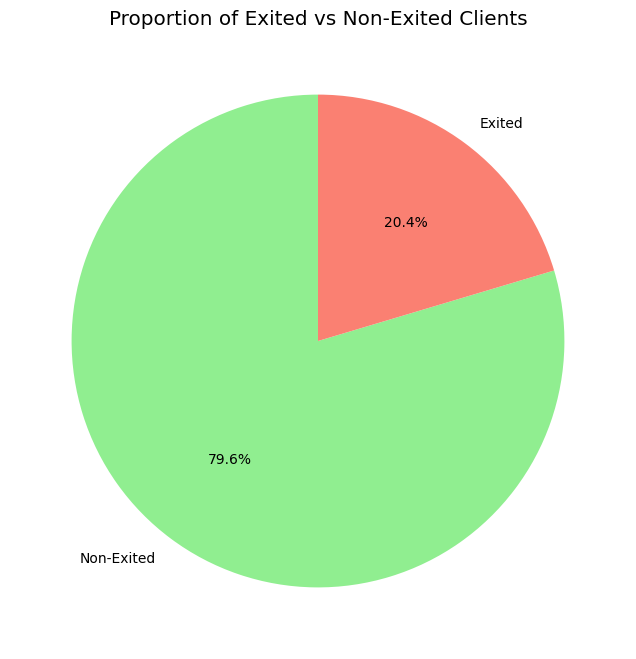

In [10]:
churn_counts = df['Exited'].value_counts()
print("Exited Clients: ", churn_counts[1])
print("Non-Exited Clients: ", churn_counts[0])

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Non-Exited', 'Exited'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Proportion of Exited vs Non-Exited Clients')
plt.show()

This chart shows the distribution of churned vs non-churned clients. We can see that our dataset is completed by 2038 clients who churned and 7962 who not (20.4% - 79.6%), this indicates a moderate imbalance between the classes. This imbalance can affect model's performance and lead to poor recall for the minority class or misleading performance metrics. To adress this imbalance we could undersample non-exited clients, adjust class weights or use metrics suitable for imbalanced data.

Text(0, 0.5, 'Count')

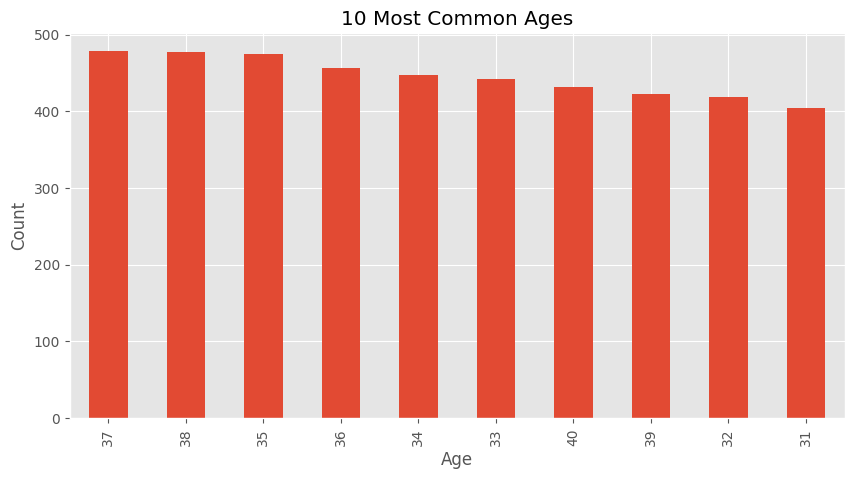

In [11]:
ax = df['Age'].value_counts() \
    .head(10) \
    .plot(kind='bar', figsize=(10,5), title='10 Most Common Ages')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

In this plot we can see how the most common clients over our dataset are middle aged clients, in between the range of 30 to 40 years old.

Text(0, 0.5, 'Count')

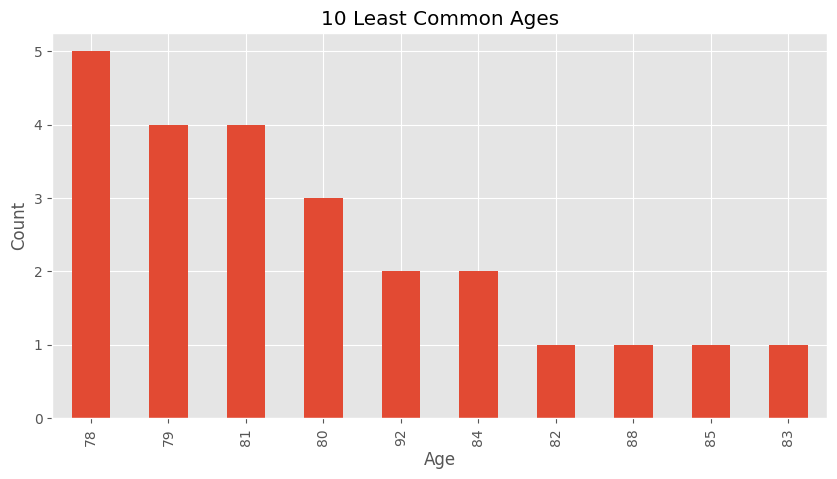

In [12]:
ax = df['Age'].value_counts() \
    .tail(10) \
    .plot(kind='bar', figsize=(10,5), title='10 Least Common Ages')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

On the other side, the 10 least common ages in the dataset predominantly belong to elderly clients, with ages around 75 years old and older. We can see that there are very few customers in this age group, which will might be treated as outliers later.

Text(0, 0.5, 'Count')

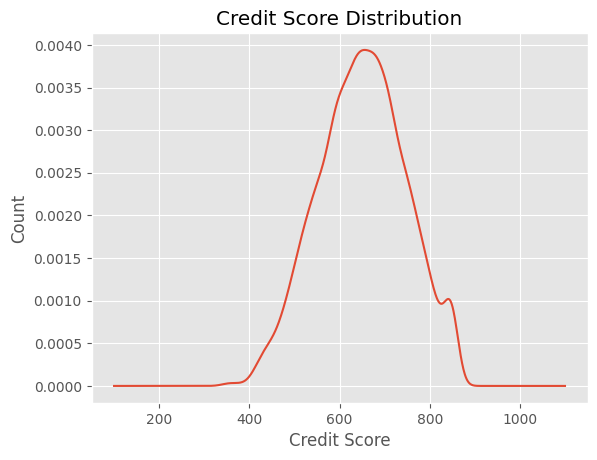

In [13]:
ax = df['CreditScore'].plot(kind='kde',
                              title='Credit Score Distribution',)

ax.set_xlabel('Credit Score')
ax.set_ylabel('Count')

The credit score distribution shows a peak around 700, indicating most customers have a high credit rating. Scores range from 400 to 900, covering a wide spectrum of creditworthiness.

Gender
Male      5457
Female    4543
Name: count, dtype: int64


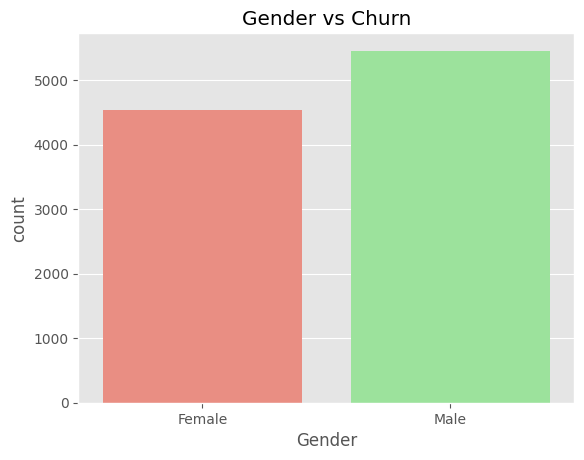

In [12]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

sns.countplot(data=df, x='Gender', hue='Gender', legend=False, palette=['salmon', 'lightgreen'])
plt.title("Gender vs Churn")
plt.show()

The data is also balanced looking at the customers gender, showing a small diference of 5457 male customers over 4543 female customers.

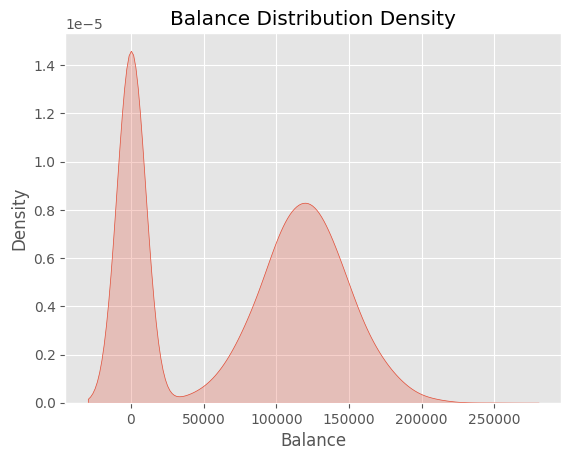

In [13]:
sns.kdeplot(data=df, x='Balance', fill=True)
plt.title("Balance Distribution Density")
plt.show()

The red curve represents the distribution of all clients, showing a broader range of balances with a peak near zero, and a smaller peak around 125.000.

Clients with a credit card (HasCrCard = 1): 7055
Clients without a credit card (HasCrCard = 0): 2945


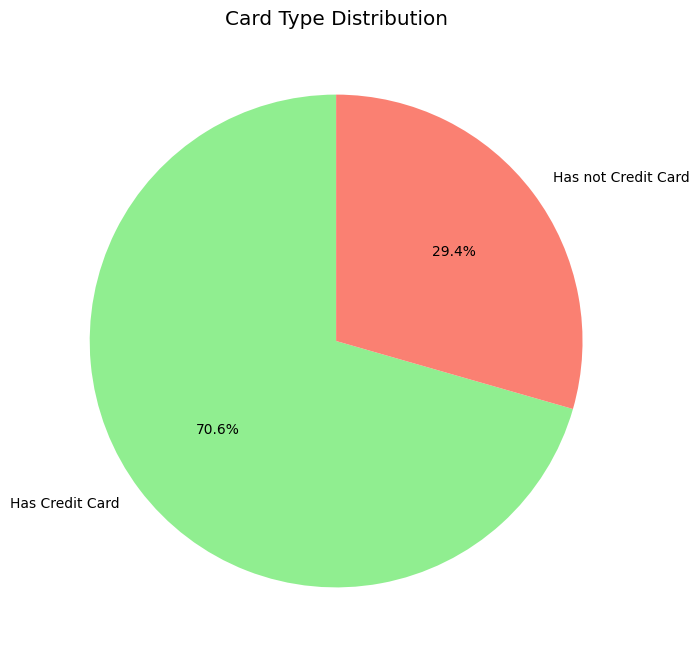

In [14]:
has_cr_card_counts = df['HasCrCard'].value_counts()
print(f"Clients with a credit card (HasCrCard = 1): {has_cr_card_counts[1]}")
print(f"Clients without a credit card (HasCrCard = 0): {has_cr_card_counts[0]}")

plt.figure(figsize=(8, 8))
plt.pie(has_cr_card_counts, labels=["Has Credit Card", "Has not Credit Card"], autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Card Type Distribution')
plt.show()
plt.show()

There appears to be a potential imbalance in the dataset between clients who have a credit card and those who do not. This imbalance might hinder the model's predictions if the group with fewer samples is underrepresented. This would be something to take into account later.

Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


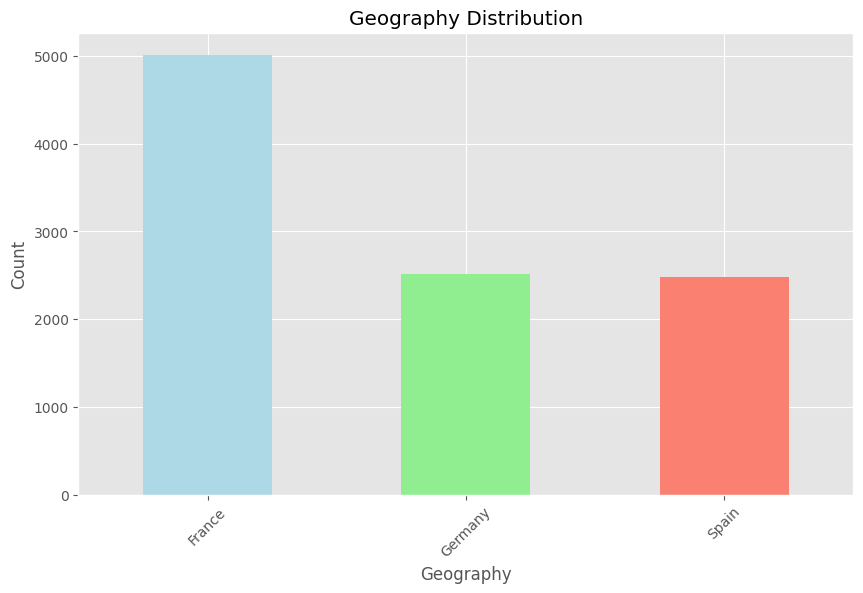

In [15]:
geography_counts = df['Geography'].value_counts()
print("Geography Distribution:\n",geography_counts)


geography_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Geography Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

We can see that France has the largest number of clients, while Germany and Spain have similar client counts. This also could mean that German and Spanish customers are undersampled in the dataset.

Card Type Distribution:
 Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


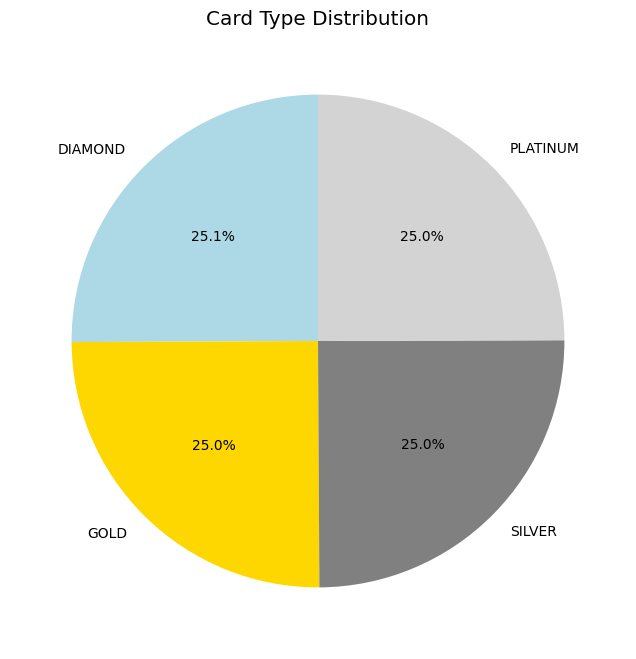

In [16]:
card_type_counts = df['Card Type'].value_counts()
print("Card Type Distribution:\n", card_type_counts)

plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'gold', 'grey', 'lightgrey'], startangle=90)
plt.title('Card Type Distribution')
plt.show()

Number of Products Distribution:
 NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


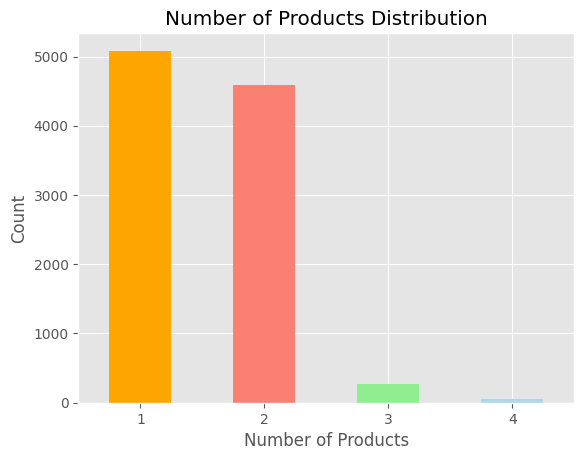

In [17]:
num_of_products_counts = df['NumOfProducts'].value_counts()
print("Number of Products Distribution:\n", num_of_products_counts)

num_of_products_counts.plot(kind='bar', stacked=True, color=['orange','salmon', 'lightgreen', 'lightblue'])
plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

The dataset reveals that the majority of clients have either 1 or 2 products, while very few have 3 or 4 products. This also indicates a significant imbalance in the NumOfProducts feature, with higher product categories being underrepresented. To manage this, we could consider grouping 3 and 4 into a single category or maybe doing just 2 categories (1 product / more than 1 product).

Satisfaction Distribution:
 Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


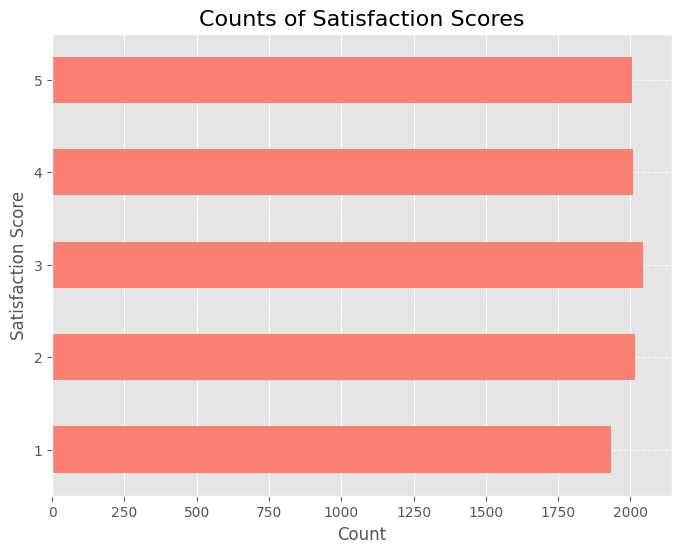

In [18]:
satisfaction_score_counts = df['Satisfaction Score'].value_counts()
print("Satisfaction Distribution:\n", satisfaction_score_counts)

plt.figure(figsize=(8, 6))
df['Satisfaction Score'].value_counts().sort_index().plot(kind='barh', color='salmon')
plt.title('Counts of Satisfaction Scores', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Satisfaction scores are balanced in the dataset, so it shouldnt disturb the modeling.

### Step 4: Feature Relationships
- Heatmap Correlation
- Pairplot
- Scatterplot
- Groupby comparisons

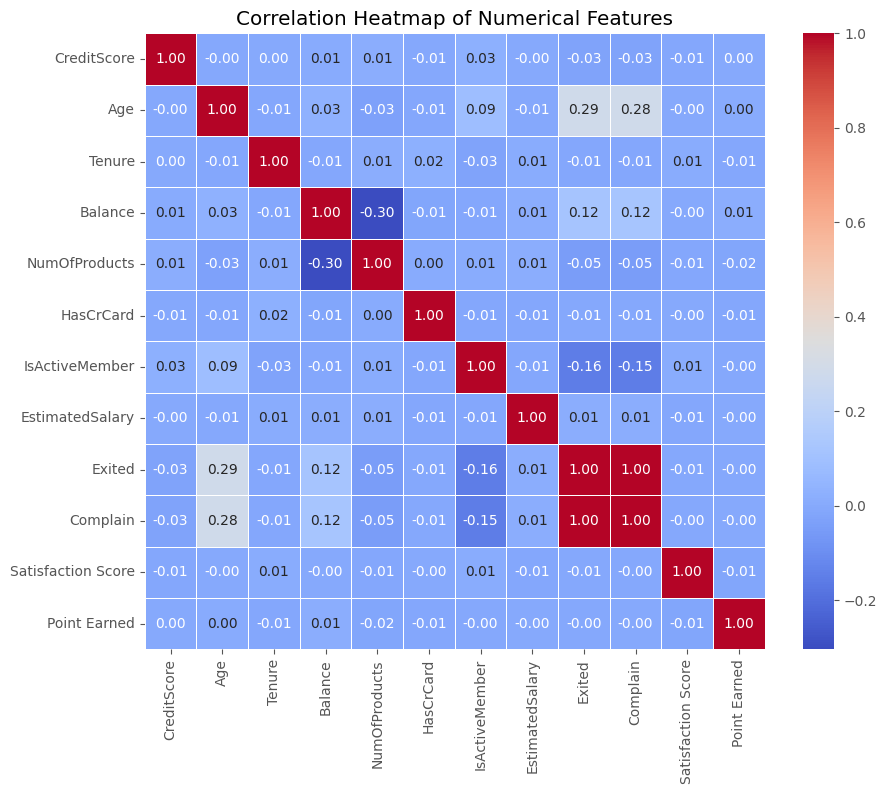

In [19]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

As we can se in this *Correlation Heatmap* not many features have big correlations between others. This are some of the most correlated features shown by the plot:
- Complain & Exit
- Number of Products & Balance
- Age & exit
- Is Active Member & Exit
- Balance & Exit

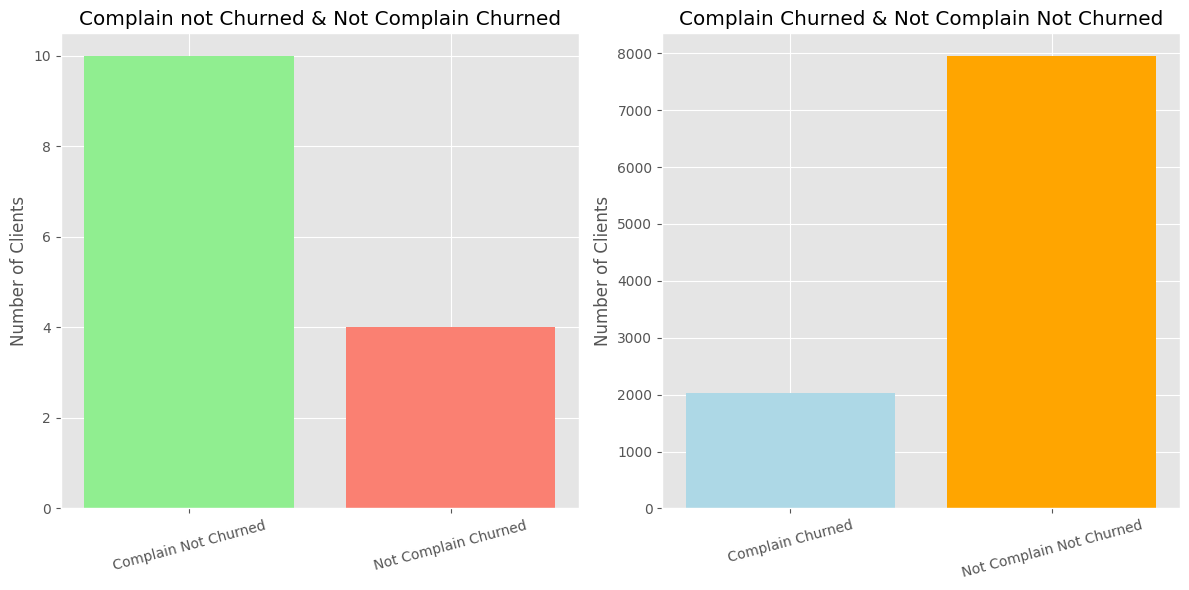

In [20]:
complain_not_churned = df[(df['Complain'] == 1) & (df['Exited'] == 0)]
complain_not_churned_count = complain_not_churned.shape[0]

not_complain_churned = df[(df['Complain'] == 0) & (df['Exited'] == 1)]
not_complain_churned_count = not_complain_churned.shape[0]

complain_churned = df[(df['Complain'] == 1) & (df['Exited'] == 1)]
complain_churned_count = complain_churned.shape[0]

not_complain_not_churned = df[(df['Complain'] == 0) & (df['Exited'] == 0)]
not_complain_not_churned_count = not_complain_not_churned.shape[0]



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(['Complain Not Churned', 'Not Complain Churned'], 
            [complain_not_churned_count, not_complain_churned_count], 
            color=['lightgreen', 'salmon'])
axes[0].set_title("Complain not Churned & Not Complain Churned")
axes[0].set_ylabel("Number of Clients")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Complain Not Churned', 'Not Complain Churned'], rotation=15)

axes[1].bar(['Complain Churned', 'Not Complain Not Churned'], 
            [complain_churned_count, not_complain_not_churned_count], 
            color=['lightblue', 'orange'])
axes[1].set_title("Complain Churned & Not Complain Not Churned")
axes[1].set_ylabel("Number of Clients")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Complain Churned', 'Not Complain Not Churned'], rotation=15)

plt.tight_layout()
plt.show()

As the previous correlation heatmap shows, the exit and complain features have a 100% correlation. Just 10 people complained and not churned and 4 people did not complain when they churned. This could lead to some potential issues, such as high predictive power of features. If complaints strongly correlate with churn, it might dominate predictions in a machine learning model, leading to biased outcomes. On other side, if complaints almost always lead to churn, it may highlight weaknesses in the bank’s issue resolution process. Addressing complaints promptly and effectively could improve retention.

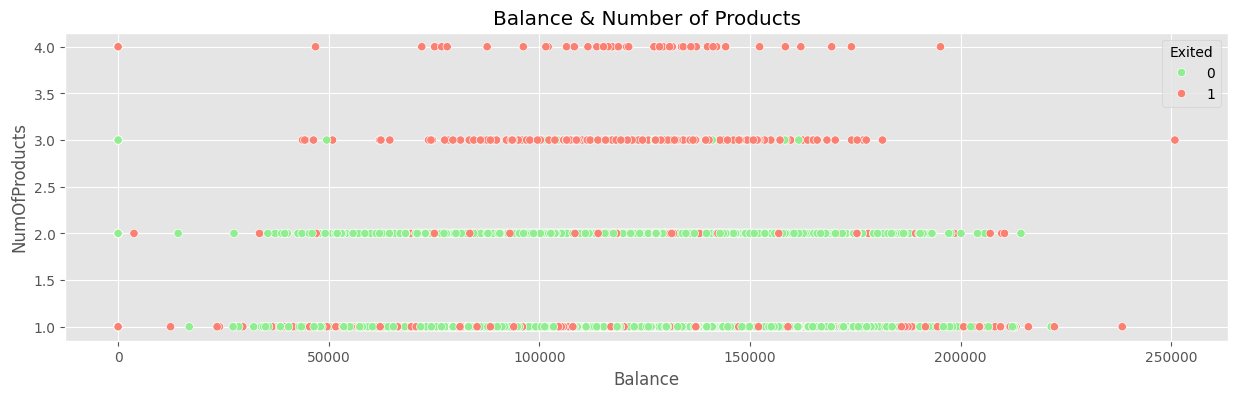

In [21]:
plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df,
    x='Balance',
    y='NumOfProducts',
    hue='Exited',
    palette=['lightgreen', 'salmon'],
)
plt.title('Balance & Number of Products')
plt.show()

In this scatterplot we can see how clients with 3 or more products have a high tendency of churning. In the feature understanding we saw how just 324 clients have 3 or more products, and we said that we might get together every client with 2 or more products.

In [22]:
aid_df = df[['Balance', 'NumOfProducts', 'Exited']].copy()
aid_df['NumOfProducts'] = aid_df['NumOfProducts'].apply(lambda x: '2+' if x >= 2 else str(x))

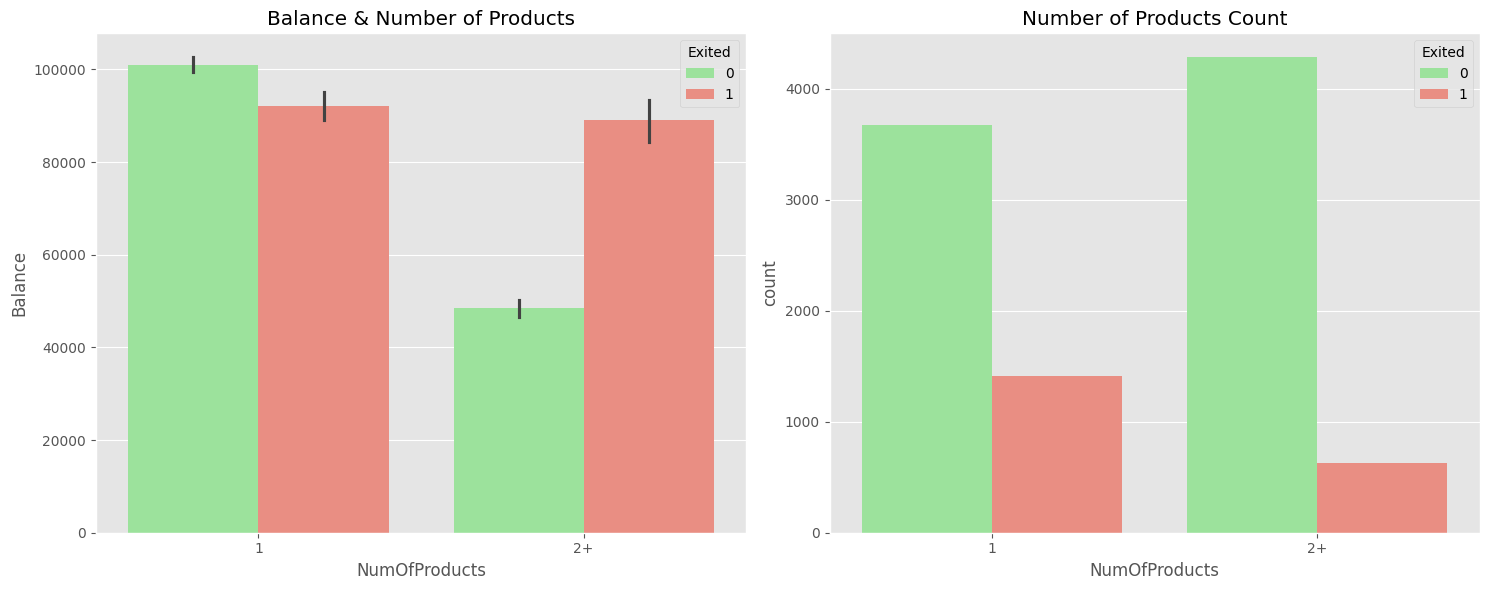

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=aid_df, x='NumOfProducts', y='Balance', hue='Exited', palette=['lightgreen', 'salmon'], ax=axes[0])
axes[0].set_title("Balance & Number of Products")

sns.countplot(data=aid_df, x='NumOfProducts', hue='Exited', palette=['lightgreen', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Products Count")

plt.tight_layout()
plt.show()

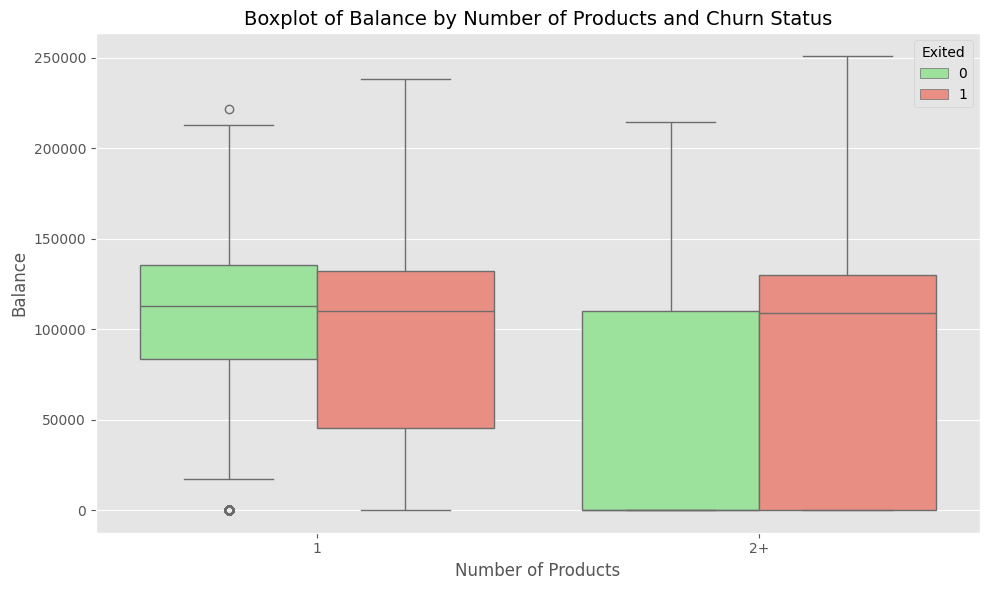

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aid_df, x='NumOfProducts', y='Balance', hue='Exited', palette=['lightgreen', 'salmon'])

plt.title("Boxplot of Balance by Number of Products and Churn Status", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.legend(title='Exited')

plt.tight_layout()
plt.show()

Customers with 2+ products tend to have higher balances on average, and a many of these customers churn. This suggests that while having more products may increase a customer's financial engagement with the bank, it also correlates with a higher risk of them leaving.

Customers with only 1 product generally have lower balances, but a relatively higher proportion of these customers also churn. This indicates that having just one product may also contribute to a higher risk of churn.

The majority of customers own 2 or more products, and they exhibit a relatively stable balance. This suggests that while churn is present, it does not dominate the behavior of the majority of customers with multiple products.

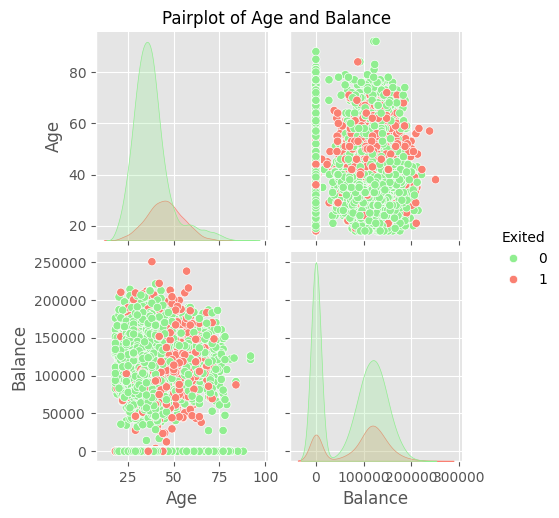

In [25]:
sns.pairplot(df, vars=['Age', 'Balance'], hue='Exited', palette=['lightgreen', 'salmon'])
plt.suptitle('Pairplot of Age and Balance', y=1.02)
plt.show()

The pairplot shows the relationships between Age and Balance, with each point colored based on whether the customer churned or not. Many conclusion can be taken from this plot:

Churned clients are more concentrated in the middle age range (around 30-60 years old).

The churn rate closely follows the distribution of clients in balance range.

Churned clients with low balances are concentrated in the younger age groups, while in the 40-60 age range, churned clients have slightly higher balances (5,000-20,000).

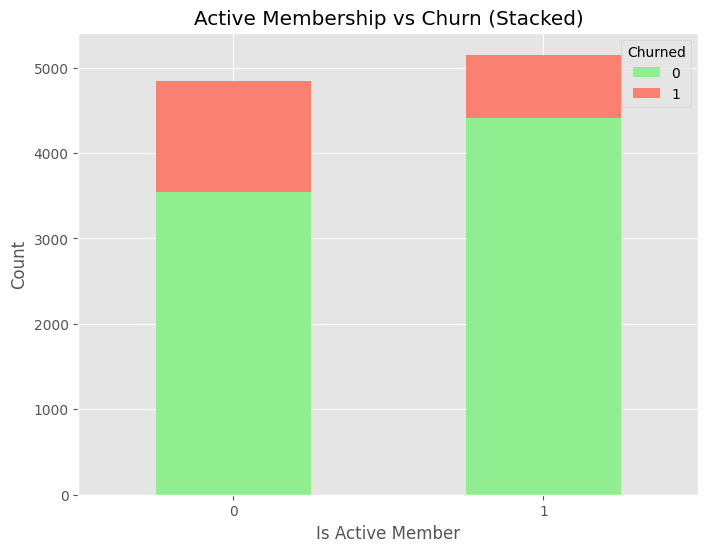

In [26]:
grouped_data = df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

grouped_data.plot(
    kind='bar', 
    stacked=True, 
    color=['lightgreen', 'salmon'], 
    figsize=(8, 6)
)

plt.title("Active Membership vs Churn (Stacked)")
plt.xlabel("Is Active Member")
plt.ylabel("Count")
plt.legend(title="Churned")
plt.xticks(rotation=0)
plt.show()

Non-active members show a slightly higher tendency to churn, as seen by their relatively larger proportion of exited clients compared to active members. This could indicate that engagement plays a role in customer retention.

# 2. Feature Engineering

In this section, we will apply some feature engineering techniques to improve the dataset's usability and try to improve the model's performance. By transforming variables, such as creating categories or simplifying values, we aim to enhance interpretability, address imbalances, and potentially improve our predictive power. These changes may influence the model's outcomes, making this process a crucial step in the analysis. In this stage we will be applying the following techniques:

- Data Cleaning
- Feature Transformation
- Feature Encoding
- Feature Scaling

## Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv(r'src/rawDataset.csv')
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [4]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

No duplicated rows found in the dataset.


**RESULT:**

As shown, our dataset seems to be complete and reliable. There are no missing values, ensuring every column is fully populated, and there are no duplicate records, which maintains the accuracy of our analysis. 

## FEATURE TRANSFORMATION

We have decided to transform the Age column into a categorical variable because its distribution does not appear to be normal. This could be due to the presence of outliers, which can significantly affect the distribution's shape and make it look skewed. By categorizing the Age column (Like this: <30, '30-40', '40-50', '50-60', '>60'), we can mitigate the influence of these outliers and make the data more suitable for modeling.

In [5]:
dfFeature= df

bins = [0, 30, 40, 50, 60, 100]  
labels = ['<30', '30-40', '40-50', '50-60', '>60']

dfFeature['Age'] = pd.cut(dfFeature['Age'], bins=bins, labels=labels, right=False)
dfFeature.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,40-50,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,40-50,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,40-50,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,30-40,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,40-50,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**EXPLANATION:**

We have also decided to transform NumOfProducts column as it only has 4.3% of the values corresponding to a value higher than 2. Simplifying it to a binary variable (Like this: "more than one product: yes/no") could improve interpretability and address potential class imbalance, making the data more manageable for analysis.

In [6]:
dfFeature['NumOfProducts'] = np.where(dfFeature['NumOfProducts'] > 1, 1, 0)
dfFeature.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,40-50,2,0.00,0,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,40-50,1,83807.86,0,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,40-50,8,159660.80,1,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,30-40,1,0.00,1,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,40-50,2,125510.82,0,1,1,79084.10,0,0,5,GOLD,425


## FEATURE ENCODING

Now we will split our categorical columns including the new Age column. We will be using OneHotEncoder for having the categorical columns as separate binary columns.

In [7]:
encoder = OneHotEncoder(sparse_output=False, dtype=int)
catcols = ['Gender','Geography', 'Card Type', 'Age']
encData = encoder.fit_transform(dfFeature[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
dfFeature = pd.concat([dfFeature.drop(columns= catcols),encDF],axis=1)

dfFeature.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,...,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age_30-40,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,2,0.00,0,1,1,101348.88,1,1,2,...,0,1,0,0,0,0,1,0,0,0
1,608,1,83807.86,0,0,1,112542.58,0,1,3,...,1,1,0,0,0,0,1,0,0,0
2,502,8,159660.80,1,1,0,113931.57,1,1,3,...,0,1,0,0,0,0,1,0,0,0
3,699,1,0.00,1,0,0,93826.63,0,0,5,...,0,0,1,0,0,1,0,0,0,0
4,850,2,125510.82,0,1,1,79084.10,0,0,5,...,1,0,1,0,0,0,1,0,0,0


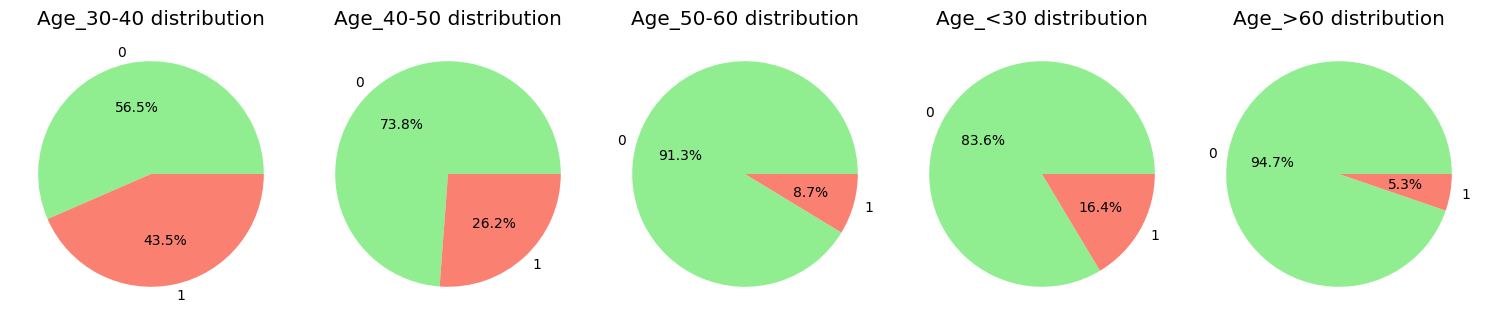

In [20]:
ageCols = dfFeature.filter(like='Age', axis=1)
plt.figure(figsize=(15, 10))  
for i, column in enumerate(ageCols, 1):
    plt.subplot(2, 5, i)  
    dfFeature[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
    plt.title(f'{column} distribution')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

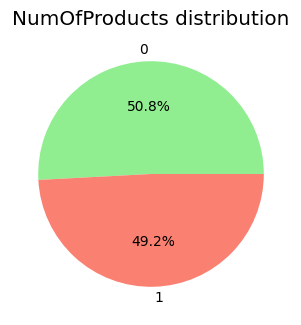

In [21]:
column = 'NumOfProducts'
plt.figure(figsize=(15, 10))
plt.subplot(2, 5, i)  
dfFeature[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title(f'{column} distribution')
plt.ylabel('') 
plt.tight_layout()
plt.show()

We can observe how now we only have binary values, which might help our model to make better predictions as having columns with that small categories that could harm the performance.

## FEATURE SELECTION

Previous Explanation:

For feature selection we have been researching on different methods, we have chosen 2: filther method, Wrapped method. Our purpose for each of then is to find which selects the best features for our models, a brief explanation about each of them could be:

- Filther Methods: Are statistical feature selection techniques to find more relevant features on a dataset without using any prediction model, depending on the input variables we are applying:

    -   Chi-square: This method is used to determine the independence of two categorical variables. Then its ideal in our case for columns like: Gender, Geography,...

    -   Anova test: As it uses means from numeric features between categorical groups defined by the target variable. Its ideal for example for Balance and Credit Score columns

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif

In [12]:
numerical_cols = [
    'CreditScore', 'Tenure', 'Balance',
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]
categorical_cols = [
    'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Complain', 'Gender_Female', 'Gender_Male',
    'Geography_France', 'Geography_Germany', 'Geography_Spain',
    'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
    'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_<30', 'Age_>60', 'Exited'
]
dfFeature[categorical_cols] = dfFeature[categorical_cols].astype('category')
dfFeature[numerical_cols] = dfFeature[numerical_cols].apply(pd.to_numeric)
print(dfFeature.dtypes)

CreditScore              int64
Tenure                   int64
Balance                float64
NumOfProducts         category
HasCrCard             category
IsActiveMember        category
EstimatedSalary        float64
Exited                category
Complain              category
Satisfaction Score       int64
Point Earned             int64
Gender_Female         category
Gender_Male           category
Geography_France      category
Geography_Germany     category
Geography_Spain       category
Card Type_DIAMOND     category
Card Type_GOLD        category
Card Type_PLATINUM    category
Card Type_SILVER      category
Age_30-40             category
Age_40-50             category
Age_50-60             category
Age_<30               category
Age_>60               category
dtype: object


## CHI-SQUARE

In [37]:
dfFeature['Exited'] = dfFeature['Exited'].astype('category')
cats = dfFeature.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

if not cats.empty:
        chi2Score, chi2Val = chi2(dfFeature[cats], le.fit_transform(dfFeature['Exited']))
        chi2Results = pd.DataFrame({'Feature': dfFeature[cats].columns, 'Chi2 Score': chi2Score, 'p-Value': chi2Val})
        chi2Sel = chi2Results[chi2Results['p-Value'] < 0.05]
        print("Características categóricas seleccionadas:")
        print(chi2Sel)

Características categóricas seleccionadas:
              Feature   Chi2 Score        p-Value
0       NumOfProducts   174.301778   8.505154e-40
2      IsActiveMember   118.543911   1.318038e-27
3              Exited  7962.000000   0.000000e+00
4            Complain  7887.606705   0.000000e+00
5       Gender_Female    61.623587   4.158076e-15
6         Gender_Male    51.302173   7.918794e-13
7    Geography_France    54.644909   1.443979e-13
8   Geography_Germany   225.008895   7.309210e-51
9     Geography_Spain    20.972597   4.658998e-06
14          Age_30-40   241.537191   1.817748e-54
15          Age_40-50   176.021186   3.582693e-40
16          Age_50-60   681.068598  3.913292e-150
17            Age_<30   166.304621   4.745970e-38
18            Age_>60    18.560097   1.646309e-05


**Results:**

Chi-square test revealed several significant categorical features that are strongly related to the target variable Exited(wheter a customer left the bank). Features like NumOfProducts, IsActiveMember, Complain, and demographics such as Gender and Geography show strong relationships with the likelihood of customer churn. All features have p-values below 0.05, indicating statistical significance.

## ANNOVA TEST

In [38]:
nums = dfFeature.select_dtypes(include=['float64', 'int64']).columns

if not nums.empty:
        annScore, annPVal = f_classif(dfFeature[nums], le.fit_transform(dfFeature['Exited']))
        annResults = pd.DataFrame({'Feature': nums, 'F-Score': annScore, 'p-Value': annPVal})
        annSel = annResults[annResults['p-Value'] < 0.05]
        print(annSel)

       Feature     F-Score       p-Value
0  CreditScore    7.170810  7.422037e-03
2      Balance  142.581456  1.209208e-32


**Results:**

The results we obtained from the ANNOVA test evaluate the relationship between numeric features and the target variable Exited. We stablished a minimum p-value < 0.05 because we wanted to check which features influenced more the target variable results.

In the results, Balance and CreditScore have p-values of 1.2e-32 and 0.0074, respectively, indicating strong evidence that these features affect customer exit. We only have those features as p-value < 0.05 rejects the null hypothesis, confirming the feature’s relevance.

In [39]:
selectedFeatures = list(annSel['Feature'])+list(chi2Sel['Feature']) 
print(selectedFeatures)

dfFSel = dfFeature[selectedFeatures]
dfFSel.head()

['CreditScore', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Exited', 'Complain', 'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_<30', 'Age_>60']


,CreditScore,Balance,NumOfProducts,IsActiveMember,Exited,Complain,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Age_30-40,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,0.00,0,1,1,1,1,0,1,0,0,0,1,0,0,0
1,608,83807.86,0,1,0,1,1,0,0,0,1,0,1,0,0,0
2,502,159660.80,1,0,1,1,1,0,1,0,0,0,1,0,0,0
3,699,0.00,1,0,0,0,1,0,1,0,0,1,0,0,0,0
4,850,125510.82,0,1,0,0,1,0,0,0,1,0,1,0,0,0


# 3. Classification

After selecting the most important features by feature selection we are going to begin with classification. We will be training our models for which **EXITED**  is going to be our target as our main task is to predict if a client wil leave or not a Bank. We will be using the following algorithms:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)
- Naive Bayes

As out dataset is umbalanced, we are expecting to have low values in some of our metrics due to our imbalanced dataset. We are going to be applying class_weight='balanced' parameter to our models to have more fiable results as the model will be penalized more for misclassifying the minority class, like that we could adjust the model to the data. 
We are also applying Stratified K-Fold Cross-Validation to handle class imbalance, ensuring fair performance evaluation. Our goal metric is to maximize the ROC-AUC score, as we want to prioritize model discrimination ability for imbalanced classes.

We are using 5 metrics to evaluate our models: **accuracy, precision, recall, f1, roc-auc**. As each of them can tell us important information about our models. As for example:

- Accuracy gives us the overall percentage of correct predictions, but it may not be reliable in imbalanced datasets, as it can be high even if the model fails to identify minority class cases (e.g., churn).

- Precision helps us understand how many of the predicted "churn" cases are actually correct. It’s crucial when the cost of false positives (e.g., offering incentives to non-churning customers) is high.

- Recall shows us how many actual "churn" cases were correctly identified. It’s important when the goal is to identify as many churners as possible, even if that means some non-churners are incorrectly labeled.

- F1-Score balances both precision and recall, providing a single metric that helps us evaluate the trade-off between the two, especially when dealing with imbalanced classes.

- ROC-AUC measures the model's ability to distinguish between churners and non-churners. It provides insight into the model's overall discriminatory power, regardless of threshold, and is especially useful when we care about both true positive and false positive rates.

Each of these metrics gives us a different perspective on how well our model is performing and could be interesting in our project perspective as maybe we will be having clients that seem to be churning but finally no, and contrary.

In [23]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

## Logistic Regression

In [24]:
X = dfFeature.drop(['Exited','Complain'], axis=1)
y = dfFeature['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

The hyperparameters that are going to be tunned are:

- Solver: Different solvers (lbfgs, liblinear, saga, sag) to account for varying dataset sizes and characteristics, ensuring flexibility in optimization.
- C (Inverse of Regularization Strength): A logarithmic scale (1e-6 to 1e2) to explore a wide range, allowing the model to generalize well without overfitting or underfitting.
- max_iter: The iteration range (100 to 5000) ensures the model converges even for complex datasets, preventing early stopping.



In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear", "saga","sag"])
    C = trial.suggest_float("C", 1e-6, 1e2, log =True)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    model = LogisticRegression(
        solver=solver,
        C=C,
        random_state=42,
        class_weight='balanced',
        max_iter= max_iter
    )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

logisticStudy = optuna.create_study(direction='maximize')
logisticStudy.optimize(objective,n_trials=500, n_jobs=-1)
print("Best hyperparameters:", logisticStudy.best_params)

best_params = logisticStudy.best_params
logistic_model = LogisticRegression(**best_params, class_weight='balanced', random_state=42)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

[I 2024-12-23 09:54:59,938] A new study created in memory with name: no-name-34e00638-062f-4ea7-9551-f19bc9e4c0bc
[I 2024-12-23 09:55:04,964] Trial 19 finished with value: 0.7947602353824967 and parameters: {'solver': 'liblinear', 'C': 0.0005521973204912225, 'max_iter': 178}. Best is trial 19 with value: 0.7947602353824967.
[I 2024-12-23 09:55:04,970] Trial 4 finished with value: 0.7888771176238311 and parameters: {'solver': 'lbfgs', 'C': 1.3492732821427087e-05, 'max_iter': 132}. Best is trial 19 with value: 0.7947602353824967.
[I 2024-12-23 09:55:04,982] Trial 12 finished with value: 0.7886122641600293 and parameters: {'solver': 'liblinear', 'C': 6.667536721715285e-06, 'max_iter': 493}. Best is trial 19 with value: 0.7947602353824967.
[I 2024-12-23 09:55:05,026] Trial 0 finished with value: 0.7961196559794279 and parameters: {'solver': 'sag', 'C': 0.07718099694163663, 'max_iter': 360}. Best is trial 0 with value: 0.7961196559794279.
[I 2024-12-23 09:55:05,039] Trial 18 finished with v

Best hyperparameters: {'solver': 'saga', 'C': 0.04487960597783652, 'max_iter': 619}


In [27]:
best_params = logisticStudy.best_params
logistic_model = LogisticRegression(
    solver=best_params["solver"],
    C=best_params["C"],
    random_state=42,
    class_weight='balanced',
    max_iter=best_params["max_iter"]
)

logistic_model.fit(X_train_scaled, y_train)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logistic_score = cross_val_score(logistic_model, X_train_scaled, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()

### MODEL EVALUATION

Accuracy: 73.50%
Precision: 41.41%
Recall: 72.06%
F1 Score: 52.59%
ROC AUC Score: 81.07%
Error Rate: 26.50%


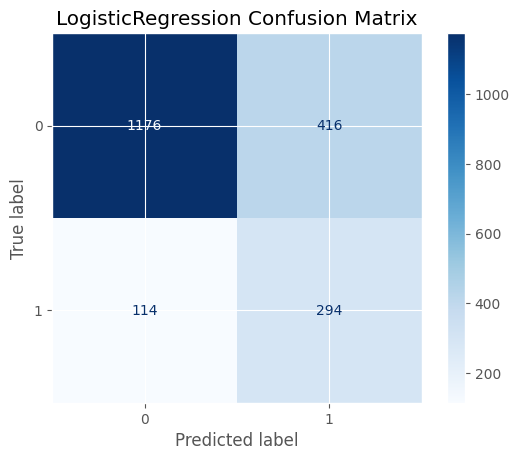

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy * 100,
    "Precision": precision * 100,
    "Recall": recall * 100,
    "F1 Score": f1 * 100,
    "ROC AUC Score": roc_auc * 100,
    "Error Rate": (1 - accuracy) * 100,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap="Blues")
plt.title("LogisticRegression Confusion Matrix")
plt.show()


**Model Evaluation Summary:**

Our logistic regression model shows good results in some aspects but not that good in others. We obtained a pretty solid ROC-AUC which means that our model is robust in distinguishing classes same with values for accuracy and recall, in our project we want to focus more in that we have obtained much better recall than precision(as we have 416 false positives which shows a clear imbalance), indicating a focus on minimizing false negatives.


## CART (Decision Tree Classifier)

For our Decision Tree Classifier, we are using Optuna for hyperparameter tuning, evaluating the following hyperparameters:

- max_depth: Tree depth (3 to 50) to control model complexity and prevent overfitting by limiting how deep each tree can grow.
- min_samples_split: Minimum samples required to split a node (2 to 32), preventing the model from creating overly complex trees.
- min_samples_leaf: Minimum samples at a leaf node (1 to 32), controlling the smallest size of terminal nodes to ensure the model generalizes well.
- max_features: Number of features to consider at each split (sqrt, log2, or all), providing flexibility in feature selection and improving model robustness.



With the Decision Tree Classifier, we expect to have higher accuracy for our dataset as it can capture more complex, non-linear relationships between features. In comparison to Logistic Regression, the Decision Tree may offer us more flexibility and better performance, though it may also be more prone to overfitting without proper tuning. We will need to be careful with it.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 3, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight="balanced", 
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

treeStudy = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=42))
treeStudy.optimize(objective, n_trials=500, n_jobs=-1)

print("Best hyperparameters:", treeStudy.best_params)
best_params = treeStudy.best_params

[I 2024-12-22 23:28:02,889] A new study created in memory with name: no-name-08b40b61-c266-4018-96a6-9431653f3148
[I 2024-12-22 23:28:03,062] Trial 1 finished with value: 0.7290014542862921 and parameters: {'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 0.7290014542862921.
[I 2024-12-22 23:28:03,107] Trial 0 finished with value: 0.7313880247710223 and parameters: {'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.7313880247710223.
[I 2024-12-22 23:28:03,138] Trial 3 finished with value: 0.7489364929548978 and parameters: {'max_depth': 23, 'min_samples_split': 22, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 3 with value: 0.7489364929548978.
[I 2024-12-22 23:28:03,155] Trial 2 finished with value: 0.6888860263312498 and parameters: {'max_depth': 39, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 

Best hyperparameters: {'max_depth': 6, 'min_samples_split': 21, 'min_samples_leaf': 30, 'max_features': None}


In [26]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
decision_tree = DecisionTreeClassifier(**best_params, class_weight='balanced', random_state=42)

decision_tree.fit(X_train, y_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(decision_tree, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]

### MODEL EVALUATION

Accuracy: 73.95%
Precision: 42.01%
Recall: 75.31%
F1 Score: 53.93%
ROC AUC Score: 79.96%
Error Rate: 26.05%


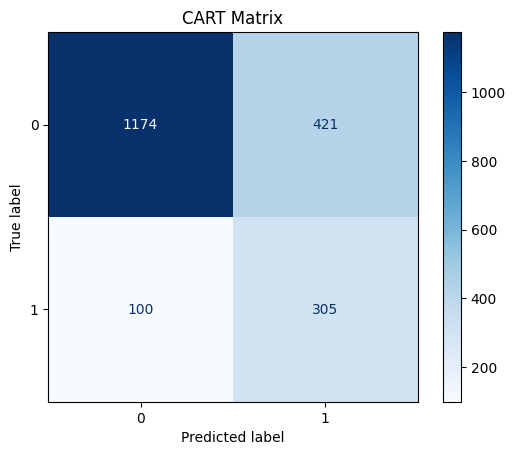

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy * 100,
    "Precision": precision * 100,
    "Recall": recall * 100,
    "F1 Score": f1 * 100,
    "ROC AUC Score": roc_auc * 100,
    "Error Rate": (1 - accuracy) * 100,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree.classes_)
disp.plot(cmap="Blues")
plt.title("CART Matrix")
plt.show()

**Model Evaluation Summary:**
We where right with our hypothesis about the Decision Tree Classifier as as with this hyperparameters: {'max_depth': 6, 'min_samples_split': 21, 'min_samples_leaf': 30, 'max_features': None} we achieved a solid performance with an accuracy of 73.95%, demonstrating its ability to capture important patterns in the data. However, again we obtained a relatively low precision (42.01%) indicates that it struggles with false positives as we can see in the confusion matrix.

## RANDOM FOREST

For our Random Forest model, we are using Optuna for hyperparameter tuning, evaluating the following hyperparameters:

- n_estimators: The number of trees (100 to 1000) to balance model complexity and performance, ensuring sufficient trees to reduce variance without overfitting.
- max_depth: Tree depth (3 to 50) to control model complexity and prevent overfitting by limiting how deep each tree can grow.
- min_samples_split: Minimum samples required to split a node (2 to 32), preventing the model from creating overly complex trees.
- min_samples_leaf: Minimum samples at a leaf node (1 to 32), controlling the smallest size of terminal nodes to ensure the model generalizes well.
- max_features: Number of features to consider at each split (sqrt, log2, or all), providing flexibility in feature selection and improving model robustness.

We are expecting Random Forest to have better results that the previous 2 algorithms, at least better results that the decision tree as
The Random Forest Classifier combines multiple decision trees to make more robust and accurate predictions. As this model benefits from averaging the predictions of several individual trees, reducing overfitting and improving generalization in addition it handles a higher degree of feature interactions and noise in the data, which may explain its better results.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight="balanced", 
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

best_params =study.best_params
best_model = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

[I 2024-12-22 20:47:42,975] A new study created in memory with name: no-name-75c82842-4f21-497c-8f58-e63c3a6fcc47
[I 2024-12-22 20:47:51,951] Trial 3 finished with value: 0.8087690574105999 and parameters: {'n_estimators': 822, 'max_depth': 47, 'min_samples_split': 29, 'min_samples_leaf': 21, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.8087690574105999.
[I 2024-12-22 20:47:55,995] Trial 1 finished with value: 0.8148072348335276 and parameters: {'n_estimators': 530, 'max_depth': 7, 'min_samples_split': 26, 'min_samples_leaf': 19, 'max_features': None}. Best is trial 1 with value: 0.8148072348335276.
[I 2024-12-22 20:48:06,111] Trial 2 finished with value: 0.8094234862420665 and parameters: {'n_estimators': 454, 'max_depth': 36, 'min_samples_split': 23, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8148072348335276.
[I 2024-12-22 20:48:08,669] Trial 13 finished with value: 0.8083245851431652 and parameters: {'n_estimators': 166, 'max_depth': 34

Best hyperparameters: {'n_estimators': 441, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 13, 'max_features': None}


### MODEL EVALUATION

Accuracy: 76.35%
Precision: 44.90%
Recall: 70.10%
F1 Score: 54.74%
ROC AUC Score: 82.36%
Error Rate: 23.65%


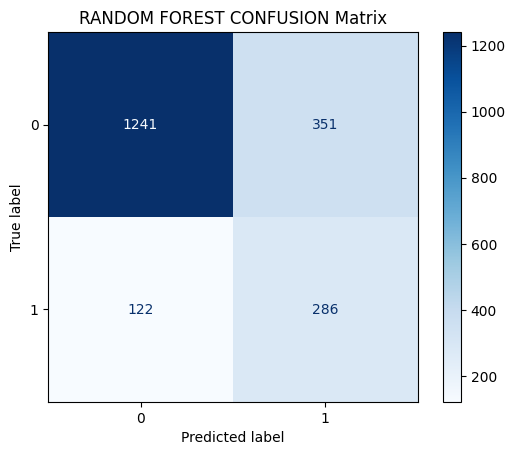

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy * 100,
    "Precision": precision * 100,
    "Recall": recall * 100,
    "F1 Score": f1 * 100,
    "ROC AUC Score": roc_auc * 100,
    "Error Rate": (1 - accuracy) * 100,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("RANDOM FOREST CONFUSION Matrix")
plt.show()

**Model Evaluation Summary:**

Our predictions were right even if we find just a little improvement. For our Random Forest model trained with the hyperparemeters: {'n_estimators': 441, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 13, 'max_features': None}, we observe similar trends as in logistic regression, with a slightly lower recall of 0.7 and precision of 0.45. However, compared to other model, we have seen an improvement in accuracy and also in the number of true negatives (TN), which have increased 60, and a reduction in false positives (FP). This improvement suggests that randomForest is becoming more conservative in predicting churners, thereby reducing the number of incorrect predictions.

## SUPPORT VECTOR MACHINES (SVM)

For our Support Vector Classifier (SVC) model, we are using Optuna for hyperparameter tuning. The following hyperparameters are being evaluated:

- C: Regularization parameter (ranging from 1e-3 to 1e2).

- kernel: Specifies the type of kernel function used linear kernel. Because it is generally speaking the simpler, more efficienct, and has the strongest performance with linearly separable data.

- gamma: Defines how much influence a single training example has. Choices are "scale" (1 / (n_features * X.var())) and "auto" (1 / n_features). Higher gamma = model will be more sensitive to the training data, leading to overfitting, Lower gamma = may underfit the model.

With the Support Vector Machine (SVM), we expect to achieve good performance in our data. We think it can struggle if it doesn't find the optimal kernel which is hard to determine. If it ddoes we expect to have a balance between accuracy and recall, but precision may be lower.

In [22]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    C = trial.suggest_float("C", 1e-3, 1e2, log=True)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    
    model = SVC(
        C=C,
        kernel="linear",
        gamma=gamma,
        probability=True,
        random_state=42,
        class_weight="balanced"
    )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=8, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

best_params = study.best_params
best_model = SVC(**best_params,class_weight='balanced', random_state=42 ,probability=True)

best_model.fit(X_train_scaled,y_train )

y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

[I 2024-12-22 20:50:15,633] A new study created in memory with name: no-name-51585a73-67af-4cd9-aa2f-d97895fe47cb


[I 2024-12-22 20:50:26,944] Trial 4 finished with value: 0.7851860234419392 and parameters: {'C': 0.9522355408880301, 'gamma': 'auto'}. Best is trial 4 with value: 0.7851860234419392.
[I 2024-12-22 20:50:36,177] Trial 2 finished with value: 0.785790852442912 and parameters: {'C': 0.0048910134239100005, 'gamma': 'auto'}. Best is trial 2 with value: 0.785790852442912.
[I 2024-12-22 20:50:36,861] Trial 1 finished with value: 0.7873472277065616 and parameters: {'C': 0.0029981411170046618, 'gamma': 'scale'}. Best is trial 1 with value: 0.7873472277065616.
[I 2024-12-22 20:50:38,072] Trial 0 finished with value: 0.7851561672332925 and parameters: {'C': 3.5606470028014963, 'gamma': 'auto'}. Best is trial 1 with value: 0.7873472277065616.
[I 2024-12-22 20:50:45,685] Trial 6 finished with value: 0.7825317101828935 and parameters: {'C': 1.0760675264145052, 'gamma': 'auto'}. Best is trial 1 with value: 0.7873472277065616.
[I 2024-12-22 20:50:57,108] Trial 5 finished with value: 0.7815657173676455

Best hyperparameters: {'C': 0.0029981411170046618, 'gamma': 'scale'}


### MODEL EVALUATION

Accuracy: 72.30%
Precision: 39.94%
Recall: 71.08%
F1 Score: 51.15%
ROC AUC Score: 78.56%
Error Rate: 27.70%


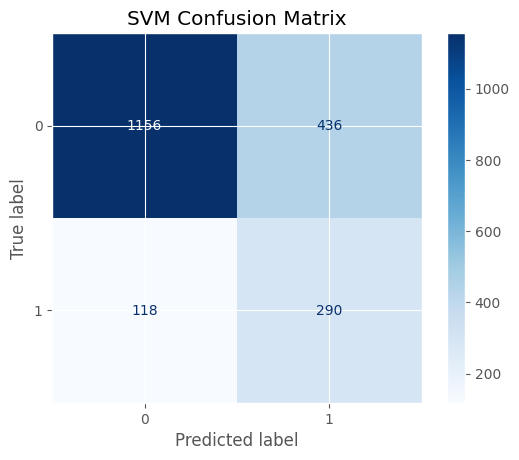

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy * 100,
    "Precision": precision * 100,
    "Recall": recall * 100,
    "F1 Score": f1 * 100,
    "ROC AUC Score": roc_auc * 100,
    "Error Rate": (1 - accuracy) * 100,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()


**Model Evaluation Summary:**

Using the hyperparameters {'C': 0.0029981411170046618, 'gamma': 'scale'}. The SVM model delivered an accuracy of 72.30%, showing its capability to classify data reasonably well. However, we are still in the same line with low precision (39.94%) suggests a higher rate of false positives, and while recall is relatively good (71.08%), there is room for improvement in balancing these metrics.

## NAIVE BAYES

With the Naive Bayes model, we can expect relatively high accuracy, as our data follows more or less a simple distribution. However, since Naive Bayes assumes independence between features, it may struggle with some correlations. We anticipate to have moderate precision and recall.

In [24]:
scaler = StandardScaler()
xStandard = scaler.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(xStandard, y, test_size = 0.2, random_state = 0)
model = GaussianNB()

model.fit(X_train, y_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### MODEL EVALUATION

Accuracy: 79.50%
Precision: 49.45%
Recall: 55.56%
F1 Score: 52.33%
ROC AUC Score: 78.40%
Error Rate: 20.50%


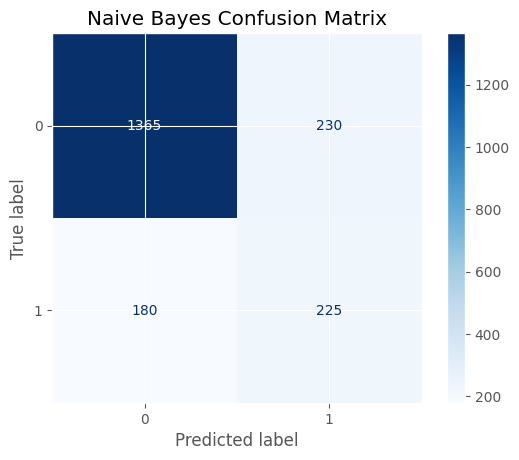

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy * 100,
    "Precision": precision * 100,
    "Recall": recall * 100,
    "F1 Score": f1 * 100,
    "ROC AUC Score": roc_auc * 100,
    "Error Rate": (1 - accuracy) * 100,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


**Model Evaluation Summary:**

The Naive Bayes model achieved an accuracy of 79.50%, indicating good overall performance as it also shows the confusion matrix with the number of TN. However, its precision (49.45%) and recall (55.56%) suggested that the we have lost some information for the TP which number has reduced but also the number of flase positives has decresaed a lot which seems to be positive.

## CLASSIFICATION CONCLUSION

**BEST ALGORITHM**

In our machine learning project, we trained several models to predict the target variable. Among the models test Random Forest Classifier yielded the best results with some pretty good results after 50 trials we finded this hyperparameters {'n_estimators': 441, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 13, 'max_features': None}, by tunning the with Optuna. We obtained the following results:

- Accuracy: 76.35%
- Precision: 44.90%
- Recall: 70.10%
- F1 Score: 54.74%
- ROC AUC Score: 82.36%
- Error Rate: 23.65%


On one hand it has better accuracy mostly all of the models, which give us a good idea of a client leaving or not the bank. But also it has a 70% recall which is the most important metric for us, as we want to be able to predict the clients that are at the highest risk of leaving. This high recall means the model successfully identifies most churners, minimizing false negatives, which is crucial for proactive retention strategies. Additionally, the model’s ROC-AUC score of 82.5% reflects strong discriminatory power, reinforcing its reliability in distinguishing between clients who stay and those who leave. Overall, the Random Forest model provides a solid balance between precision and recall, making it the most effective choice for mitigating churn and improving client retention efforts.

**MODEL RESULTS EXPLAINED**


On the other hand, models like Logistic Regression and Naive Bayes, which are simpler linear models, struggled maybe find relationships in our data. While these models are efficient and fester, they are less powerful in our case where the relationships between features are non-linear or highly interdependent. Even if Naive Bayes optained interesting results as it reduced a lot the number of FP we still have problems with the overall performance.

But we want to make a reflexion about Precision, as we were expecting to have some issues with the results of this metric and it happened as in all of our models the results tend to be really low. It can be primarily attributed to the class imbalance as we mentioned in the explanation at the beginning of this section. So what we expected to be solved with class_weight hyperparameter in our models didn't seem to be solved or at least that wasn't the issue. This bring us to think that our dataset is incoherent or lacks of important features for the positive registers.

**Improves**

One potential improvement could be if we had more time making more trials for each of the models at the time of hyperparameter tunning. In addition, we are thinking that maybe we have exceeded doing some of our feature engineering tasks as from the beginning we thought taht could play a significant role in enhancing model performance. We have been investigating and maybe some other moodels could have reached better results, but we didn't have the time to try them at all

**Conclusion**

A theory we also have from the beginning of the project is that the data itself can significantly limit the performance of the models. If the data is imbalanced, where one class is underrepresented, models like Logistic Regression and Naive Bayes may struggle, leading to nonsense predictions. Techniques like oversampling, undersampling, or applying class weights could help mitigate this issue.

In summary, the Random Forest Classifier outperformed other models due to its ability to handle complex feature interactions and reduce overfitting. However, there is always room for improvement, especially through hyperparameter optimization, feature engineering, and addressing data quality issues. The limitations of the data, such as imbalance, noise, or missing values, are factors that can be addressed to improve overall model performance. By focusing on these aspects, we can enhance the robustness and accuracy of our machine learning models.

# 4. REGRESSION

For this section, we have decided to choose 'Balance' as the target variable for regression. The main reason for this is that usin a binary variable doesnt make much sense for regression, so we have decided to get insight in this variable. We know that we have prepared our that to predict the 'exited' variable and not 'Balance', so before starting, we dont expect the regression models to perform well. 

Predicting a customer’s balance can provide valuable insights into their financial behavior and potential risk of churn. By understanding patterns in balance fluctuations, the business can identify customers who may require targeted offers or interventions to improve retention.

For Regression we are going to apply all metrics we have studied:

- R-squared (R²) gives us the proportion of the variance in the dependent variable that is predictable from the independent variables. However, it can be overly optimistic with complex models, as it always increases when additional predictors are added, even if they don’t improve the model.

- Adjusted R-squared (Adj R²) adjusts the R-squared value for the number of predictors in the model. It is particularly useful for comparing models with different numbers of predictors, as it penalizes the addition of non-significant predictors.

- Mean Absolute Error (MAE) measures the average magnitude of errors in a set of predictions, without considering their direction. It’s a straightforward metric that provides the average distance between the predicted values and actual values in the dataset.

- Mean Squared Error (MSE) is the average of the squares of the errors. It gives higher weight to larger errors, which makes it useful when you want to penalize bigger discrepancies more severely.

- Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error, providing an error metric in the same units as the response variable. It’s widely used because it’s more interpretable in the context of the data.

Each of these metrics gives us a different perspective on how well our regression model is performing and could be interesting in our project as they help us understand both the accuracy and the reliability of our predictions, ensuring we are capturing the true relationship between variables without overfitting.

In [9]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np
import optuna
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor, TweedieRegressor, QuantileRegressor, SGDRegressor, LinearRegression, TheilSenRegressor, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR

## LINEAR REGRESSION

This model is used to get the relationship between a dependent variable and one independent variables (in our case but we could select multiple variables). We consider it simple and appropriate to start with regression models, that is why we will start with linear regression. 

To approach this model, first we have chosen the Ridge and Optuna libraries, Ridge is a regularized linear regression variant and we will use it because it prodives us the alpha hyperparameter. Also, Optuna is a nice tool for hyperparameter tuning, we think that the model is fast enough to make 500 trials, and get the best possible hyperparameters:

- alpha: given by Ridge, 'α' selects the regularization strength, if its 0, it would perform the same as an standard linear regression. We have selected a value between 0.00001 and 300.

As said before, We dont expect a good performance of this model, because our data is not prepared to use balance as our target variable-

In [42]:
X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-5, 300)
    
    model = Ridge(alpha=alpha, random_state=42)
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")


[I 2024-12-22 21:03:13,251] A new study created in memory with name: no-name-d359f795-a241-4e24-8423-1d7ed6c627ad
[I 2024-12-22 21:03:13,453] Trial 5 finished with value: -2817837048.453691 and parameters: {'alpha': 92.14650099917353}. Best is trial 5 with value: -2817837048.453691.
[I 2024-12-22 21:03:13,458] Trial 6 finished with value: -2817855428.653196 and parameters: {'alpha': 174.2761672068311}. Best is trial 5 with value: -2817837048.453691.
[I 2024-12-22 21:03:13,460] Trial 1 finished with value: -2818111357.759326 and parameters: {'alpha': 38.53235859600475}. Best is trial 5 with value: -2817837048.453691.
[I 2024-12-22 21:03:13,466] Trial 10 finished with value: -2818391511.2437487 and parameters: {'alpha': 292.6050612748044}. Best is trial 5 with value: -2817837048.453691.
[I 2024-12-22 21:03:13,467] Trial 8 finished with value: -2818093740.4805083 and parameters: {'alpha': 240.8227185472273}. Best is trial 5 with value: -2817837048.453691.
[I 2024-12-22 21:03:13,470] Trial

Best Hyperparameters: {'alpha': 127.13600873051143}


### MODEL EVALUATION

In [43]:
best_params = study.best_params
best_model = Ridge(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2791119060.614967
Mean Absolute Percentage Error (MAPE): 7.950442374486675e+19
Root Mean Squared Error (RMSE): 52831.042584970506
R-squared (R²): 0.2766742901336461


MSE and RMSE values are really high, this means that the model's predictions are far from the actual values.
MAPE (7.95) has a low value considering the previous ones and R² is low (0.27), this means that the independent 'balance' variable doesn't explain properly the the variation in the dependent ones. 
So overall, the model is not performing good, this could be due to outliers in the 'balance' variable, but using the 'exited' variable as a target variable doesnt make sense for regression in our work. 

## Generalized linear regression

Generalized Linear Models using the 'TweedieRegressor' library, is a variant of the linear regression that allows a distributions of the target variable. Again, we will use Optuna to optimize the hyperparameters of the model, in this case, 100 tries will be enough to get appropriate hyperparameters:
- power: Determines the variance structure of the target variable. We have set a range between 1 and 2.
- alpha: As with the linear regression, we will measure the penalty applied to the model to reduce overfitting. We have set a renge of 0.00001 to 10.

Again, we dont expect the model to perform well because of the target variable issue, but at least better that the default linear regression model.

In [30]:
X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    power = trial.suggest_float('power', 1.0, 2.0)
    alpha = trial.suggest_float('alpha', 1e-5, 10)

    model = TweedieRegressor(power=power, alpha=alpha, link='log', max_iter=1000)

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")

[I 2024-12-23 09:57:31,507] A new study created in memory with name: no-name-75834f5c-715b-4627-88e3-04e32d45c2a0
[I 2024-12-23 09:57:32,291] Trial 9 finished with value: -3030705092.0293593 and parameters: {'power': 1.8172887224112206, 'alpha': 5.454468865900589}. Best is trial 9 with value: -3030705092.0293593.
[I 2024-12-23 09:57:32,503] Trial 7 finished with value: -3038231312.674311 and parameters: {'power': 1.7827196307050754, 'alpha': 8.769636967124773}. Best is trial 9 with value: -3030705092.0293593.
[I 2024-12-23 09:57:32,594] Trial 5 finished with value: -3051281988.3691854 and parameters: {'power': 1.789249119607181, 'alpha': 9.096877648993274}. Best is trial 9 with value: -3030705092.0293593.
[I 2024-12-23 09:57:32,617] Trial 14 finished with value: -3017488797.9166923 and parameters: {'power': 1.8349029252776041, 'alpha': 3.037267248954948}. Best is trial 14 with value: -3017488797.9166923.
[I 2024-12-23 09:57:32,673] Trial 4 finished with value: -3023494225.3002214 and p

Best Hyperparameters: {'power': 1.7224120982555733, 'alpha': 9.832504889426804}


The generalized model did not perform well, and the power and alpha hyperparameters havent lead to significant improvement. Compared with the linear regression we used before this one, even though it handles non gaussian distributions, this model performs worse than we would have expected, because the error measures are worse than before. We think that we should look for other models that could suit better our data.

### MODEL EVALUATION

In [45]:
best_params = study.best_params
best_model = TweedieRegressor(**best_params, link='log', max_iter=1000)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3001339254.597195
Mean Absolute Percentage Error (MAPE): 8.558706163397873e+19
Root Mean Squared Error (RMSE): 54784.48005226658
R-squared (R²): 0.22219518417715012


## Quantile regression

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    quantile = trial.suggest_float('quantile', 0.05, 0.95)

    alpha = trial.suggest_float('alpha', 1e-5, 10, log=True)

    model = QuantileRegressor(
        quantile=quantile,
        alpha=alpha,
        solver='highs'
    )

    score = cross_val_score(
        model, 
        X_train_scaled, 
        y_train, 
        cv=5, 
        scoring='neg_mean_squared_error'
    )

    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params} and Quantile: {study.best_params['quantile']}")


[I 2024-12-23 10:03:37,102] A new study created in memory with name: no-name-1fdc23fb-847b-423c-bbd1-53cdcf475040
[I 2024-12-23 10:05:21,680] Trial 7 finished with value: -3287530411.4596767 and parameters: {'quantile': 0.63169284787652, 'alpha': 0.00041790462238463355}. Best is trial 7 with value: -3287530411.4596767.
[I 2024-12-23 10:05:26,707] Trial 13 finished with value: -6256664793.069834 and parameters: {'quantile': 0.14334496844052627, 'alpha': 0.00014962586374899715}. Best is trial 7 with value: -3287530411.4596767.
[I 2024-12-23 10:05:26,719] Trial 5 finished with value: -3473198706.979766 and parameters: {'quantile': 0.636649644054391, 'alpha': 0.010076668298564191}. Best is trial 7 with value: -3287530411.4596767.
[I 2024-12-23 10:05:26,724] Trial 2 finished with value: -3577551796.69522 and parameters: {'quantile': 0.430980334671708, 'alpha': 0.001188721447428491}. Best is trial 7 with value: -3287530411.4596767.
[I 2024-12-23 10:05:26,732] Trial 4 finished with value: -48

Best Hyperparameters: {'quantile': 0.63169284787652, 'alpha': 0.00041790462238463355} and Quantile: 0.63169284787652


In [33]:
best_params = study.best_params
best_quantile = best_params.pop('quantile') 

best_model = QuantileRegressor(
    quantile=best_quantile,
    alpha=best_params['alpha'],
    solver='highs'
)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3186170684.674181
Mean Absolute Percentage Error (MAPE): 1.162740024916458e+20
Root Mean Squared Error (RMSE): 56446.17511111077
R-squared (R²): 0.17429564192810243


## Polynomial regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import optuna

X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    degree = trial.suggest_int('degree', 1, 5)
    alpha = trial.suggest_float('alpha', 1e-5, 1000)
    
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    
    model = Ridge(alpha=alpha)
    
    score = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")

[I 2024-12-23 10:07:41,910] A new study created in memory with name: no-name-359e758f-f6fe-4a16-b60d-2241a3c33687
[I 2024-12-23 10:07:43,011] Trial 18 finished with value: -2818200947.851051 and parameters: {'degree': 1, 'alpha': 30.209603175200193}. Best is trial 18 with value: -2818200947.851051.
[I 2024-12-23 10:07:43,042] Trial 5 finished with value: -2820095649.5650344 and parameters: {'degree': 1, 'alpha': 473.38512150847697}. Best is trial 5 with value: -2820095649.5650344.
[I 2024-12-23 10:07:43,155] Trial 21 finished with value: -2818044060.4469237 and parameters: {'degree': 1, 'alpha': 230.1350662732931}. Best is trial 5 with value: -2820095649.5650344.
[I 2024-12-23 10:07:49,646] Trial 12 finished with value: -2659761546.7067385 and parameters: {'degree': 2, 'alpha': 707.1110998927682}. Best is trial 5 with value: -2820095649.5650344.
[I 2024-12-23 10:07:49,658] Trial 15 finished with value: -2659759807.1234584 and parameters: {'degree': 2, 'alpha': 684.1522157516454}. Best 

### MODEL EVALUATION

In [ ]:

best_params = study.best_params
degree = best_params['degree']
alpha = best_params['alpha']

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

best_model = Ridge(alpha=alpha)
best_model.fit(X_train_poly, y_train)

y_pred = best_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

## SVR

In [17]:

X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    C = trial.suggest_float("C", 0.1, 100.0, log=True)
    epsilon = trial.suggest_float("epsilon", 0.01, 1.0)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    max_iter = trial.suggest_int("max_iter", 5000, 20000, step=1000)
    
    model = SVR(C=C, epsilon=epsilon, kernel=kernel, max_iter=max_iter)
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")


[I 2024-12-23 10:16:29,231] A new study created in memory with name: no-name-5caf17e3-3d1e-497d-b24d-cbb8037865ae


[I 2024-12-23 10:19:42,771] Trial 14 finished with value: -2882300873.100421 and parameters: {'C': 24.18878993362452, 'epsilon': 0.3417688258926746, 'kernel': 'linear', 'max_iter': 9000}. Best is trial 14 with value: -2882300873.100421.
[I 2024-12-23 10:19:42,819] Trial 0 finished with value: -4297039541.098738 and parameters: {'C': 7.68454401318272, 'epsilon': 0.17926330813043617, 'kernel': 'poly', 'max_iter': 7000}. Best is trial 14 with value: -2882300873.100421.
[I 2024-12-23 10:19:44,383] Trial 1 finished with value: -4317099221.310907 and parameters: {'C': 0.2976125182793668, 'epsilon': 0.908853077433391, 'kernel': 'poly', 'max_iter': 13000}. Best is trial 14 with value: -2882300873.100421.
[I 2024-12-23 10:19:44,528] Trial 15 finished with value: -3281599018.4510407 and parameters: {'C': 5.701258644287085, 'epsilon': 0.7782642747653377, 'kernel': 'linear', 'max_iter': 11000}. Best is trial 14 with value: -2882300873.100421.
[I 2024-12-23 10:19:44,528] Trial 3 finished with value

Best Hyperparameters: {'C': 24.18878993362452, 'epsilon': 0.3417688258926746, 'kernel': 'linear', 'max_iter': 9000}


### MODEL EVALUATION

In [18]:
best_model = SVR(**study.best_params)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2944654884.202586
Mean Absolute Percentage Error (MAPE): 5.8157223979118805e+19
Root Mean Squared Error (RMSE): 54264.67436742421
R-squared (R²): 0.23688508509630846


## LinearSVR

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    C = trial.suggest_float("C", 0.1, 10.0, log=True)
    epsilon = trial.suggest_float("epsilon", 0.01, 1.0)
    max_iter = trial.suggest_int("max_iter", 1000, 10000, step=1000)

    model = LinearSVR(C=C, epsilon=epsilon, max_iter=max_iter, random_state=42)

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

[I 2024-12-22 21:03:46,555] A new study created in memory with name: no-name-e178bc21-0987-4db8-8c45-a73cf4feb3b6
[I 2024-12-22 21:03:46,761] Trial 1 finished with value: -9517146483.32661 and parameters: {'C': 0.2727994881080792, 'epsilon': 0.6103289182407792, 'max_iter': 1000}. Best is trial 1 with value: -9517146483.32661.
[I 2024-12-22 21:03:46,772] Trial 3 finished with value: -9020358006.945807 and parameters: {'C': 1.0710178253052376, 'epsilon': 0.32227690923397645, 'max_iter': 2000}. Best is trial 3 with value: -9020358006.945807.
[I 2024-12-22 21:03:46,777] Trial 0 finished with value: -8392693553.181727 and parameters: {'C': 2.139980507166145, 'epsilon': 0.7958586577911217, 'max_iter': 7000}. Best is trial 0 with value: -8392693553.181727.
[I 2024-12-22 21:03:46,792] Trial 5 finished with value: -9523139144.143867 and parameters: {'C': 0.2633973337119978, 'epsilon': 0.1822773064704562, 'max_iter': 1000}. Best is trial 0 with value: -8392693553.181727.
[I 2024-12-22 21:03:46,7

Best hyperparameters: {'C': 9.960797228575068, 'epsilon': 0.011270017942272094, 'max_iter': 4000}


### MODEL EVALUATION

In [47]:
best_model = LinearSVR(**study.best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 5108027618.897247
Mean Absolute Percentage Error (MAPE): 1.1513973628318943e+19
Root Mean Squared Error (RMSE): 71470.46676003486
R-squared (R²): -0.32375854387298175


## NuSVR

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    C = trial.suggest_float("C", 0.1, 10.0, log=True)
    nu = trial.suggest_float("nu", 0.01, 1.0)
    max_iter = trial.suggest_int("max_iter", 7000, 30000, step=1000)

    model = NuSVR(C=C, nu=nu, max_iter=max_iter)

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

[I 2024-12-23 10:25:27,210] A new study created in memory with name: no-name-55941e88-d9d1-4ab7-bbe7-bc8871c80db1


[I 2024-12-23 10:25:37,199] Trial 18 finished with value: -3967441167.218882 and parameters: {'C': 0.16310191192844276, 'nu': 0.06999868608030786, 'max_iter': 22000}. Best is trial 18 with value: -3967441167.218882.
[I 2024-12-23 10:25:37,982] Trial 5 finished with value: -3942708300.86189 and parameters: {'C': 0.12894942738261583, 'nu': 0.08876983485650145, 'max_iter': 21000}. Best is trial 5 with value: -3942708300.86189.
[I 2024-12-23 10:25:39,282] Trial 17 finished with value: -3931714813.067441 and parameters: {'C': 1.6972394572426766, 'nu': 0.09788258738504656, 'max_iter': 14000}. Best is trial 17 with value: -3931714813.067441.
[I 2024-12-23 10:25:40,198] Trial 0 finished with value: -3910488551.658507 and parameters: {'C': 1.8919108781844876, 'nu': 0.1222725616120193, 'max_iter': 13000}. Best is trial 0 with value: -3910488551.658507.
[I 2024-12-23 10:25:41,864] Trial 10 finished with value: -3900978398.491342 and parameters: {'C': 0.8308876091622519, 'nu': 0.16192734373333872,

Best hyperparameters: {'C': 3.036661923945966, 'nu': 0.18431142562716707, 'max_iter': 20000}


### MODEL EVALUATION

In [23]:
best_model = NuSVR(**study.best_params)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3863678742.929842
Mean Absolute Percentage Error (MAPE): 1.1880377202283718e+20
Root Mean Squared Error (RMSE): 62158.496948766726
R-squared (R²): -0.0012823203641891823


## SGDRegressor

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-5, 300)
    eta0 = trial.suggest_float('eta0', 1e-5, 1e-1)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    model = SGDRegressor(alpha=alpha, eta0=eta0, max_iter=max_iter, random_state=42)
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")



[I 2024-12-23 10:27:50,349] A new study created in memory with name: no-name-26d04b9e-3f3c-47e3-bd25-66491c3231b9
[I 2024-12-23 10:27:50,491] Trial 0 finished with value: -3884741486.926847 and parameters: {'alpha': 167.4481891529173, 'eta0': 0.008798808372885073, 'max_iter': 234}. Best is trial 0 with value: -3884741486.926847.
[I 2024-12-23 10:27:50,501] Trial 3 finished with value: -3860764686.8043594 and parameters: {'alpha': 73.31014299624223, 'eta0': 0.004956848305779043, 'max_iter': 725}. Best is trial 3 with value: -3860764686.8043594.
[I 2024-12-23 10:27:50,520] Trial 1 finished with value: -3491028859.7735915 and parameters: {'alpha': 5.018958922371419, 'eta0': 0.0012021952710893394, 'max_iter': 553}. Best is trial 1 with value: -3491028859.7735915.
[I 2024-12-23 10:27:50,534] Trial 5 finished with value: -3915970328.3606315 and parameters: {'alpha': 248.49552628539257, 'eta0': 0.05983418790729203, 'max_iter': 879}. Best is trial 1 with value: -3491028859.7735915.
[I 2024-12-

Best Hyperparameters: {'alpha': 0.23003707843306817, 'eta0': 0.004974781069508882, 'max_iter': 651}


In [26]:
best_params = study.best_params
best_model = SGDRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2827177487.7341948
Mean Absolute Percentage Error (MAPE): 8.524880935585587e+19
Root Mean Squared Error (RMSE): 53171.209199473684
R-squared (R²): 0.26732965566042755


## Gaussian Process Regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import optuna

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    length_scale = trial.suggest_float('length_scale', 1e-2, 10.0)  # Hyperparameter for RBF kernel
    constant_value = trial.suggest_float('constant_value', 1e-2, 10.0)  # Hyperparameter for the constant kernel
    alpha = trial.suggest_float('alpha', 1e-5, 1.0)  # Regularization parameter
    n_restarts_optimizer = trial.suggest_int('n_restarts_optimizer', 0, 10)  # Number of optimizer restarts
    
    kernel = C(constant_value) * RBF(length_scale=length_scale)
    
    model = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=n_restarts_optimizer, random_state=42)
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")

[I 2024-12-23 10:28:27,115] A new study created in memory with name: no-name-6c3642c6-583c-4904-81b3-09472b6ef4cd


In [ ]:

best_params = study.best_params
length_scale = best_params['length_scale']
constant_value = best_params['constant_value']
alpha = best_params['alpha']
n_restarts_optimizer = best_params['n_restarts_optimizer']
best_kernel = C(constant_value) * RBF(length_scale=length_scale)

best_model = GaussianProcessRegressor(kernel=best_kernel, alpha=alpha, n_restarts_optimizer=n_restarts_optimizer, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred, _ = best_model.predict(X_test_scaled, return_std=True)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

## CART (Decision Tree Regressor)

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)

best_params = study.best_params

print(f"Best Hyperparameters: {study.best_params}")

[I 2024-12-22 21:04:35,038] A new study created in memory with name: no-name-a9c77e2d-e1fd-4ebb-a6fe-a50b6b0bfad8


[I 2024-12-22 21:04:35,235] Trial 3 finished with value: -2864624631.3827405 and parameters: {'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 3 with value: -2864624631.3827405.
[I 2024-12-22 21:04:35,239] Trial 5 finished with value: -2837743013.8976803 and parameters: {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 5 with value: -2837743013.8976803.
[I 2024-12-22 21:04:35,250] Trial 0 finished with value: -3057633001.186614 and parameters: {'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 5 with value: -2837743013.8976803.
[I 2024-12-22 21:04:35,274] Trial 19 finished with value: -2795297948.7129655 and parameters: {'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 19 with value: -2795297948.7129655.
[I 2024-12-22 21:04:35,275] Trial 13 finished with value: -3230794268.52

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': None}


### MODEL EVALUATION

In [50]:
best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2575884064.0823545
Mean Absolute Percentage Error (MAPE): 7.0397755281579516e+19
Root Mean Squared Error (RMSE): 50753.16802015766
R-squared (R²): 0.332452995116848


## RANDOM FOREST REGRESSOR

In [37]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import optuna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1).mean()
    return score
rdForestStudy = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=42))
rdForestStudy.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters:", rdForestStudy.best_params)



[I 2024-12-22 23:43:43,145] A new study created in memory with name: no-name-363545bd-7543-479a-9730-59ab0a7da9f3
[I 2024-12-22 23:44:06,408] Trial 2 finished with value: -0.12198683564443949 and parameters: {'n_estimators': 710, 'max_depth': 31, 'min_samples_split': 32, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 2 with value: -0.12198683564443949.
[I 2024-12-22 23:44:20,295] Trial 0 finished with value: -0.12407361372088395 and parameters: {'n_estimators': 845, 'max_depth': 23, 'min_samples_split': 21, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 2 with value: -0.12198683564443949.
[I 2024-12-22 23:44:21,005] Trial 1 finished with value: -0.12314961744194641 and parameters: {'n_estimators': 787, 'max_depth': 22, 'min_samples_split': 25, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: -0.12198683564443949.
[I 2024-12-22 23:44:22,753] Trial 7 finished with value: -0.12283717618920531 and parameters: {'n_estimators': 575, 'max_

Best hyperparameters: {'n_estimators': 654, 'max_depth': 32, 'min_samples_split': 30, 'min_samples_leaf': 18, 'max_features': None}


In [39]:
randomForestReg = RandomForestRegressor(**rdForestStudy.best_params, random_state=42)
randomForestReg.fit(X_train_scaled, y_train)

y_pred = randomForestReg.predict(X_test_scaled)

### MODEL EVALUATION

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.1150
RMSE: 0.3391
MAPE: 561346791693300.5000
R²: 0.2716


## KKNeighborsRegressor

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 2, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)
    
    model = KNeighborsRegressor(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3, n_jobs=-1)

best_params = study.best_params


[I 2024-12-22 21:11:03,282] A new study created in memory with name: no-name-63deadb3-f11e-4deb-b9ef-6442c2aba3a5
[I 2024-12-22 21:11:03,525] Trial 0 finished with value: -3256405764.2755537 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: -3256405764.2755537.
[I 2024-12-22 21:11:03,586] Trial 2 finished with value: -2839923854.373912 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: -2839923854.373912.


### MODEL EVALUATION

In [ ]:
best_model = KNeighborsRegressor(**best_params)

best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

## HuberRegressor

In [ ]:

X = dfFeature.drop(['Balance'], axis=1)
y = dfFeature['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    epsilon = trial.suggest_float('epsilon', 1.1, 4.0)
    alpha = trial.suggest_float('alpha', 1e-4, 1.0)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    model = HuberRegressor(
        epsilon=epsilon,
        alpha=alpha,
        max_iter=max_iter
    )
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

best_params = study.best_params

### MODEL EVALUATION

In [ ]:
best_model = HuberRegressor(**best_params)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {study.best_params}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

## RANSAC

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    min_samples = trial.suggest_int("min_samples", 1, X_train_scaled.shape[0])
    residual_threshold = trial.suggest_float("residual_threshold", 1e-2, 10.0)
    max_trials = trial.suggest_int("max_trials", 100, 1000)
    model = RANSACRegressor(min_samples=min_samples, residual_threshold=residual_threshold, max_trials=max_trials, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")


In [ ]:
best_model = RANSACRegressor(**best_params)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {study.best_params}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

## THEIL SEN

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    max_iter = trial.suggest_int("max_iter", 100, 10000, step=100)
    tol = trial.suggest_float("tol", 1e-6, 1e-1, log=True)
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    model = TheilSenRegressor(max_iter=max_iter, tol=tol, fit_intercept=fit_intercept, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

print(f"Best Hyperparameters: {study.best_params}")


In [ ]:
best_model = TheilSenRegressor(**best_params)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {study.best_params}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# 5. CLUSTERING

### Pre-Clustering Analysis
Before performing a clustering process, it is essential to be clear about what is expected to be obtained and how the result can be interpreted. Clustering is an unsupervised learning technique that seeks to group similar data without the need for predefined labels. Next we will mention our expectations before starting to perform the process:

### Objectives
The main objective of clustering is to identify underlying patterns in the data that are not immediately obvious. This can allow us to:

Segment customers or users into groups with similar characteristics.
Detect atypical behavior or outliers, which could be customers with extreme characteristics or errors in our data, even if we already performed the outlier management during the EDA process.
Group customers according to their financial behavior.
This information could guide the bank management employees while developing strategies targeted to each group.

### Expectations
What we expect to obtain from this clustering process is the following:

Identification of homogeneous groups:

We expect to find clusters where customers within each group have similar characteristics. For example:
High risk clients, VIP or high worth accounts or stable clients.
Outlier detection:

Segmenting customers into clusters, we can investigate if certain groups have higher churn rates than others. This can help make decisions on how to reduce customer churn in the groups more likly to do it.

(first run the EDA process)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import (adjusted_rand_score, mutual_info_score, homogeneity_score,
                             completeness_score, v_measure_score, silhouette_score,
                             calinski_harabasz_score, davies_bouldin_score)

In [ ]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Balance_to_Salary']
categorical_features = ['Geography', 'Gender', 'Card Type']

In [ ]:
print(data[numerical_features].describe())

In [ ]:
data2 = data.drop(columns=["Exited"])

In [ ]:
data_C = data2[numeric_columns + ['Balance_to_Salary']]

In [ ]:
y = data["Exited"]

In [ ]:
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_C)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
cluster_num = 2

In [ ]:
res = {}

In [ ]:
def evaluate_clustering(true_labels, pred_labels, algorithm_name, data):
    res[algorithm_name] = {
      'Silhouette Score': silhouette_score(data, pred_labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(data, pred_labels),
        'Davies-Bouldin Index': davies_bouldin_score(data, pred_labels),
    }

partitioning

In [ ]:
kmeans = KMeans(n_clusters=cluster_num)
kmeans_labels = kmeans.fit_predict(data_C)

In [ ]:
evaluate_clustering(y, kmeans_labels, 'KMeans', data_C)

In [ ]:
print('KMeans results:')
for metric, score in res['KMeans'].items():
    print(f"{metric}: {score}")

hierarchical (does not compute cluster centers)

In [ ]:
agglo = AgglomerativeClustering(n_clusters=cluster_num)
data['Cluster'] = agglo.fit_predict(data_C)

BIRCH

In [ ]:
birch = Birch(n_clusters=cluster_num)
birch_labels = birch.fit_predict(data_C)

In [ ]:
evaluate_clustering(y, birch_labels, 'BIRCH', data_C)

In [ ]:
print('BIRCH results:')
for metric, score in res['BIRCH'].items():
    print(f"{metric}: {score}")

density based

In [ ]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)  # Adjust parameters as needed
optc_labels = optics.fit_predict(data_C)

In [ ]:
evaluate_clustering(y, optc_labels, 'OPTICS', data_C)

In [ ]:
print('OPTICS results:')
for metric, score in res['OPTICS'].items():
    print(f"{metric}: {score}")

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=cluster_num)
dbscan_labels = dbscan.fit_predict(data_C)

In [ ]:
evaluate_clustering(y, dbscan_labels, 'DBSCAN', data_C)

gaussian

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=cluster_num)
gmm_labels = gmm.fit_predict(data_C)

In [ ]:
evaluate_clustering(y, gmm_labels, 'GaussianMixture', data_C)

In [ ]:
print('GaussianMixture results:')
for metric, score in res['GaussianMixture'].items():
    print(f"{metric}: {score}")

### Silhouette
- KMeans/BIRCH: 0.999 (excellent clustering). Indicates very well-separated clusters.
- OPTICS: 0.975 (very good). Slightly lower than KMeans/- BIRCH but still highly effective.
- DBSCAN: -0.497 (poor clustering). Negative values suggest overlapping clusters or outliers.
### Calinski
- KMeans/BIRCH: 88,649.84 (exceptionally good). Suggests that the clusters are compact and distinct.
- OPTICS: 258.22 (poor). Clusters are less compact or overlapping.
- DBSCAN: 0.0076 (very poor). Indicates extreme overlap or a lack of clustering structure.
### Davies-Bouldin
- KMeans/BIRCH: 0.0945 (excellent). Very distinct and compact clusters.
- OPTICS: 2.05 (poor). Clusters are less distinct and more overlapping.
- DBSCAN: 2.48 (very poor). Significant overlap or poor separation.

Conclussions
- Kmeans and BIRCH offer the best results

BIRCH Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_C['Cluster'] = birch_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_C, x='Balance_to_Salary', y='Balance', hue='Cluster', palette='tab10', s=100, alpha=0.7)
plt.title('BIRCH Clustering Results', fontsize=16)
plt.xlabel('Balance to Salary', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = data_C['Balance_to_Salary']
y = data_C['Balance']
z = data_C['EstimatedSalary']

ax.scatter(x, y, z, c=birch_labels, cmap='tab10', s=100, alpha=0.7)

ax.set_xlabel('Balance to Salary')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
plt.title('BIRCH Clustering Visualization', fontsize=16)
plt.show()


OPTICS Visualization

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for the 3D plot
x = data_C['Balance_to_Salary']
y = data_C['Balance']
z = data_C['EstimatedSalary']

# Scatter plot
ax.scatter(x, y, z, c=optc_labels, cmap='tab10', s=100, alpha=0.7)

ax.set_xlabel('Balance to Salary')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
plt.title('OPTICS Clustering Visualization', fontsize=16)
plt.show()

KMeans Visualization

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


x = data_C['Balance_to_Salary']
y = data_C['Balance']
z = data_C['EstimatedSalary']


ax.scatter(x, y, z, c=kmeans_labels, cmap='tab10', s=100, alpha=0.7)

ax.set_xlabel('Balance to Salary')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
plt.title('KMeans Clustering Visualization', fontsize=16)
plt.show()

## Centroids Identification

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))

sns.scatterplot(x=data_C['Balance'], y=data_C['EstimatedSalary'], hue=kmeans_labels, palette='Set1', alpha=0.7, s=100)

plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='b', 
    marker='x', 
    s=169, 
    label='Centroids',
    linewidths=3,
    zorder=10)


plt.title("KMeans Centroids")
plt.xlabel('Balance')
plt.ylabel('EstimatedSalary')
plt.legend()

plt.show()


### Clustering Process Conclussions

In [ ]:
cluster_summary = data_C.groupby('Cluster').mean()
print(cluster_summary)

In [ ]:
sns.scatterplot(data=data_C, x='Balance', y='EstimatedSalary', hue='Cluster', palette='tab10')
plt.title('Cluster Distribution by Balance and EstimatedSalary')
plt.show()


In [ ]:
exit_rate = data.groupby('Cluster')['Exited'].mean()
print(exit_rate)


Meaning that 20.38% from the 0 cluster exited, while no one in the 1 cluster did.

In [ ]:
cluster_1_stats = data_C[data_C['Cluster'] == 1].describe()
cluster_0_stats = data_C[data_C['Cluster'] == 0].describe()
print(cluster_1_stats)
print(cluster_0_stats)


In [ ]:
cluster_sizes = data_C['Cluster'].value_counts()
print(cluster_sizes)


Cluster 0 contains 9998 accounts, while cluster 1 contains 2.

In [ ]:
cluster_1_data = data_C[data_C['Cluster'] == 1]
print(cluster_1_data[['Balance', 'EstimatedSalary', 'Balance_to_Salary']])


Exit Rate Analysis

Cluster 0: Exit rate of 20.38%

Cluster 1: No exit detected (0.0%)

Interpretation:


Cluster 0, reaches a 20.28%, a significative value, while cluster 1, despite its unusual characteristics, shows no churnning in this analysis. This could be due to the small size of the cluster 0 or because these clients have other characteristics that retain them. Now we will consider some possible causes and measures to be taken by the bank administration.



- Possible Causes for the cluster 0:

This cluster seems to represent most of clients, seemengliy operating normally, with normal Balance and Salary values.


Since cluster 0 contains most of the data, it is likely to be hiding subgroups with different characteristics, which may have more specific patterns.


- Possible Causes for the cluster 1:

Cluster 1 clients have values that show salaries below average, but higher balances, all inside the standard deviation. Therefore, balance to salary generates a low value.

Debt: Although they have high balance, they may have accumulated debts, and their low salary limits their ability to generate income.


Unreported income: Their estimated salaries may not reflect all of their actual income.


Extraordinary Situation: They may be in a temporary 
situation, such as people who have recently lost their jobs or sources of income but still have savings in their bank accounts.

- Possible measures:

Cluster 0 should the main focus for loyalty strategies, as it includes customers with a 20.38% churn rate.
Bank management staff could make improvements in this sector.

In respect to the cluster 1, given its low size, more personalized attention could be given by the bank management staff, in order to maintain their balances under control.

# 6. INTERPRETABILITY:

- Data load and preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
X = dfFeature.drop(['Exited','Complain'], axis=1)
y = dfFeature['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


NameError: name 'dfFeature' is not defined

## INTRINSICALLY INTERPRETABLE MODELS:

First, we are going to analyze the interpretability of some classification models we have used, which are Logistic Regression and Decision Trees. The objective is to determine which of the variables have more impact in the outcome 

### Logistic Regression

In [21]:
best_params = logisticStudy.best_params
logistic_model = LogisticRegression(
    solver=best_params["solver"],
    C=best_params["C"],
    random_state=42,
    class_weight='balanced',
    max_iter=best_params["max_iter"]
)

logistic_model.fit(X_train_scaled, y_train)
#Score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logistic_score = cross_val_score(logistic_model, X_train_scaled, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
print(logistic_score)

0.796143252015294


In [22]:
coefs_log = logistic_model.coef_
intercept_log = logistic_model.intercept_
print('coefficients: %s' % coefs_log)
print('intercept: %s' % intercept_log)

coefficients: [[-0.07078676 -0.01185544  0.07119003 -0.42785958 -0.01853562 -0.41116684
   0.03856907 -0.01583394 -0.05133057  0.14376867 -0.14376867 -0.14630825
   0.26159324 -0.09328861  0.03098735 -0.02272501 -0.006128   -0.00189051
  -0.29958235  0.26892291  0.47812588 -0.37379236  0.15468402]]
intercept: [-0.37900038]


In [23]:
# Feature Importance
coef_df = pd.DataFrame({'feature': X_train.columns.values, 'coef': coefs_log[0]})
coef_df

,feature,coef
0,CreditScore,-0.070787
1,Tenure,-0.011855
2,Balance,0.071190
3,NumOfProducts,-0.427860
4,HasCrCard,-0.018536
5,IsActiveMember,-0.411167
6,EstimatedSalary,0.038569
7,Satisfaction Score,-0.015834
8,Point Earned,-0.051331
9,Gender_Female,0.143769


In [24]:
#Standardized
stdv = np.std(X_train, 0)
abs(coefs_log.reshape(23,) * stdv).sort_values(ascending=False)

Balance               4435.444086
EstimatedSalary       2214.832170
Point Earned            11.603854
CreditScore              6.844376
NumOfProducts            0.213901
IsActiveMember           0.205470
Age_30-40                0.148593
Age_<30                  0.138702
Age_50-60                0.134840
Age_40-50                0.117570
Geography_Germany        0.113461
Geography_France         0.073154
Gender_Female            0.071544
Gender_Male              0.071544
Geography_Spain          0.040307
Age_>60                  0.034885
Tenure                   0.034265
Satisfaction Score       0.022330
Card Type_DIAMOND        0.013371
Card Type_GOLD           0.009902
HasCrCard                0.008432
Card Type_PLATINUM       0.002652
Card Type_SILVER         0.000817
dtype: float64

-Most possitively influential variables:  'Age_50-60' (0.47), 'Age_40-50' (0.26) and 'Geography_Germany' (0.26)

 -Most negatively influential variables: NumOfProducts (-0.42), 'IsActiveMember'(-0.41) and 'Age_<30' (-0.37)

 -Most influential standardized variables: 'Balance' (4435.93) and 'EstimatedSalary' (2214.62)

The logistic regression model (79.61%) indicates that age and geography, as well as the balance and the estimated salary are really important for the model's predictions.

We can see that age categories follow a clear pattern, the old customers with higher balance, have the highest chance to exit on the outcome, while the young and inactive customer is the least likely to exit.

Also, If we compare 'Gender_Female' (0.14) and 'Gender_Male' (-0.14), we can se that male customers have a negative influence and females are possitively influential in this case, showing that females are more likely to exit and males to stay. Also, German people seem to be specially predisposed to exiting banks. 

The negative intercept (-0.37) means that if there is no influence, customers are less likely to exit. But this is not relevant in out case because variables like age are practically never 0.

### Decision Tree

In [32]:
best_params = treeStudy.best_params
decision_tree = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42,
    class_weight="balanced",
)
decision_tree.fit(X_train, y_train)
#Score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
decision_score = cross_val_score(decision_tree, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
print(decision_score)   

0.7807972484620794


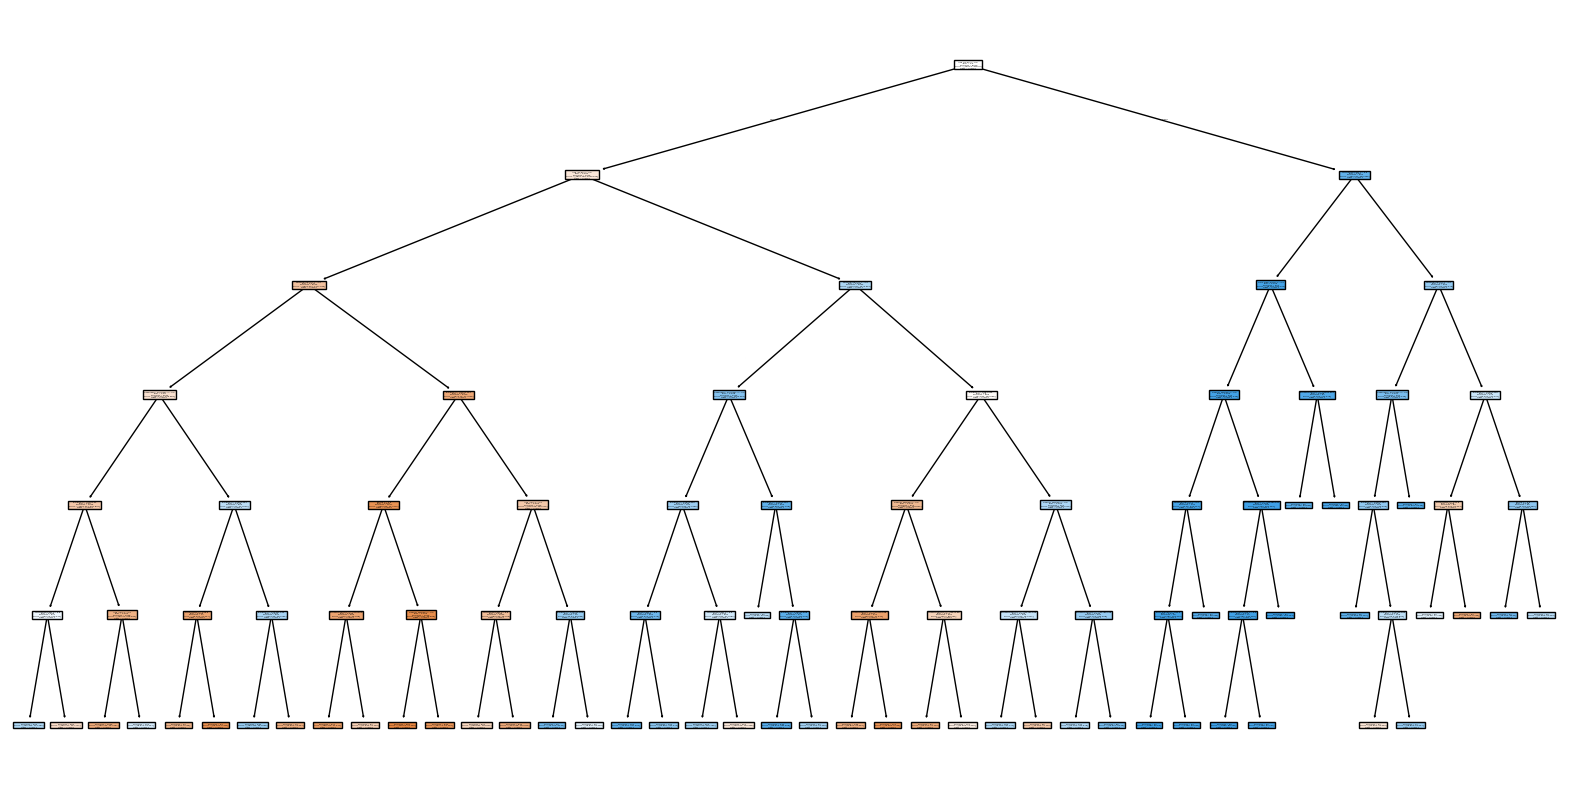

In [33]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

In [34]:
dt_imp_df = pd.DataFrame({'feature':X_train.columns.values.tolist(),
'importance': decision_tree.feature_importances_}).sort_values(by='importance', ascending=False)
dt_imp_df

,feature,importance
20,Age_50-60,0.240021
19,Age_40-50,0.226292
2,Balance,0.203205
3,NumOfProducts,0.129622
12,Geography_Germany,0.067535
5,IsActiveMember,0.060896
22,Age_>60,0.034305
6,EstimatedSalary,0.015292
9,Gender_Female,0.011420
1,Tenure,0.007149


The decision tree model (78.91%) suggests that it's most important features are 'Age_50-60' (0.22), 'Balance' (0.19), 'Age_40-50' (0.19) and 'NumOfProducts' (0.10). The rest have low or 0 relevance. 

In conclussion, the decision tree model supports our logistic regression model's conclussions which are the most important factors.

## GLOBAL MODEL AGNOSTIC METHODS

The second step is to understand which is the way our models work, for that we are going to use PDP and ALE:

### Partial Dependence Plot (PDP)

For this section, we are going to apply PDP to the most influential variables of the decision tree model

c:\Users\dekum\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\dekum\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\dekum\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\dekum\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\dekum\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.w

Text(0.5, 0.98, 'Partial Dependence Plots - Decision Tree')

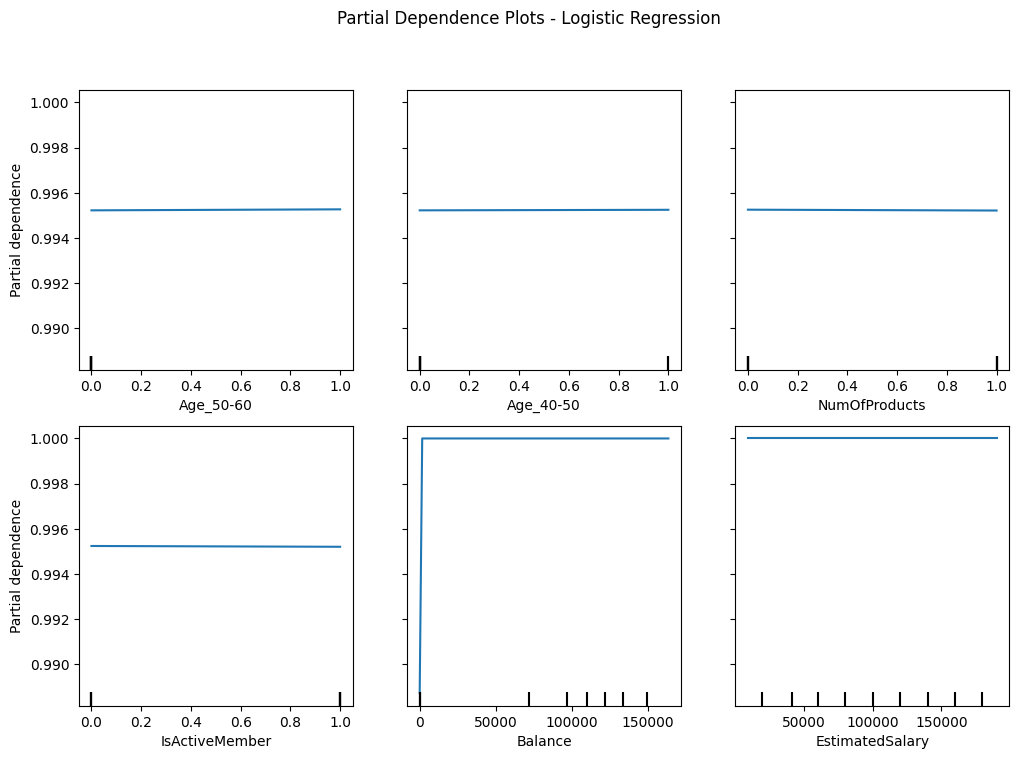

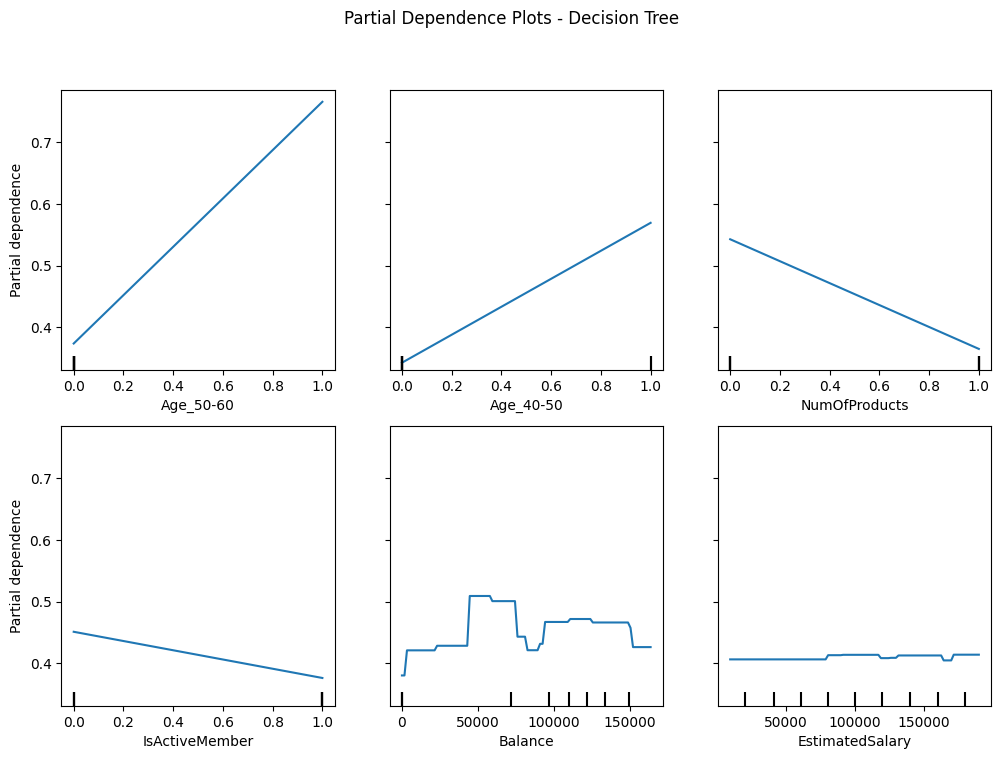

In [36]:
features = ["Age_50-60", "Age_40-50","NumOfProducts", "IsActiveMember", "Balance", "EstimatedSalary"]


fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(logistic_model, X_train, features, kind="average", ax=ax)
display.figure_.suptitle("Partial Dependence Plots - Logistic Regression")

fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(decision_tree, X_train, features, kind="average", ax=ax)
display.figure_.suptitle("Partial Dependence Plots - Decision Tree")

The result suggests that firstly, for both 'Age_50-60' and 'Age_40-50', as the value increases (it can only be 0 or 1), the chances of exit prediction also increases, although its less pronounced for the 40-50 age varaible, the effects is really similar. Also, it seems like the 'NumOfProducts' variable has almost the contrary effect on the model if we compare it with 'Age_40-50', and much the same happens with 'isActiveMember', but less strongly.  

Secondly, the relation between the 'Balance' variable's value, and the changes of exit prediction change, not as in the previous case. So, as well as we know that this variable is really important for the model's predictions, now we know that the way this variable is considered for the model's prediction is not linear, as we could have guessed → (Higher balance → + chances of exit).

### Accumulated Local Effects (ALE)

In [ ]:
from alibi.explainers import ALE, plot_ale
import numpy as np

features = ['Age_50-60', 'Balance', 'Age_40-50', 'NumOfProducts', 'IsActiveMember', 
            'Geography_Germany', 'Age_>60', 'CreditScore', 'EstimatedSalary', 'Tenure', 
            'Gender_Male', 'Point Earned', 'Gender_Female', 'Satisfaction Score', 
            'Card Type_DIAMOND', 'Card Type_GOLD', 'HasCrCard', 'Geography_Spain', 
            'Geography_France', 'Age_30-40', 'Card Type_SILVER', 'Card Type_PLATINUM', 'Age_<30']
#Logistic regression
X_train_np = X_train[features].to_numpy().astype(float)
logisticALE = ALE(logistic_model.predict, feature_names=features)
logisticExp = logisticALE.explain(X_train_np)
# Plot ALEs
plot_ale(logisticExp, n_cols=4, fig_kw={'figwidth': 14, 'figheight': 14})
logisticMSE = mean_squared_error(y_test, logistic_model.predict(X_test))
print(f"Logistic Regression MSE: {logisticMSE}")
#Decision Tree
X_train_np = X_train[features].to_numpy().astype(float)
dTreeALE = ALE(decision_tree.predict, feature_names=features)
dTreeExp = dTreeALE.explain(X_train_np)
# Plot ALEs
plot_ale(dTreeExp, n_cols=4, fig_kw={'figwidth': 14, 'figheight': 14})
dTreeMSE = mean_squared_error(y_test, decision_tree.predict(X_test))
print(f"Logistic Regression MSE: {dTreeMSE}")

IMPORTANT: We tried to use alibi for this, but as it uses obsolete versions of diferent python libraries, we ended up not being able to run other methods because of that. To fix it, we have decided to run the same code in google collab, so the image below is the result. We are sorry for the inconvenience but this is the best solution we have found. So we just want to explain that the code works fine, the issue is the alibi library.

Logistic Regression MSE: 0.7885

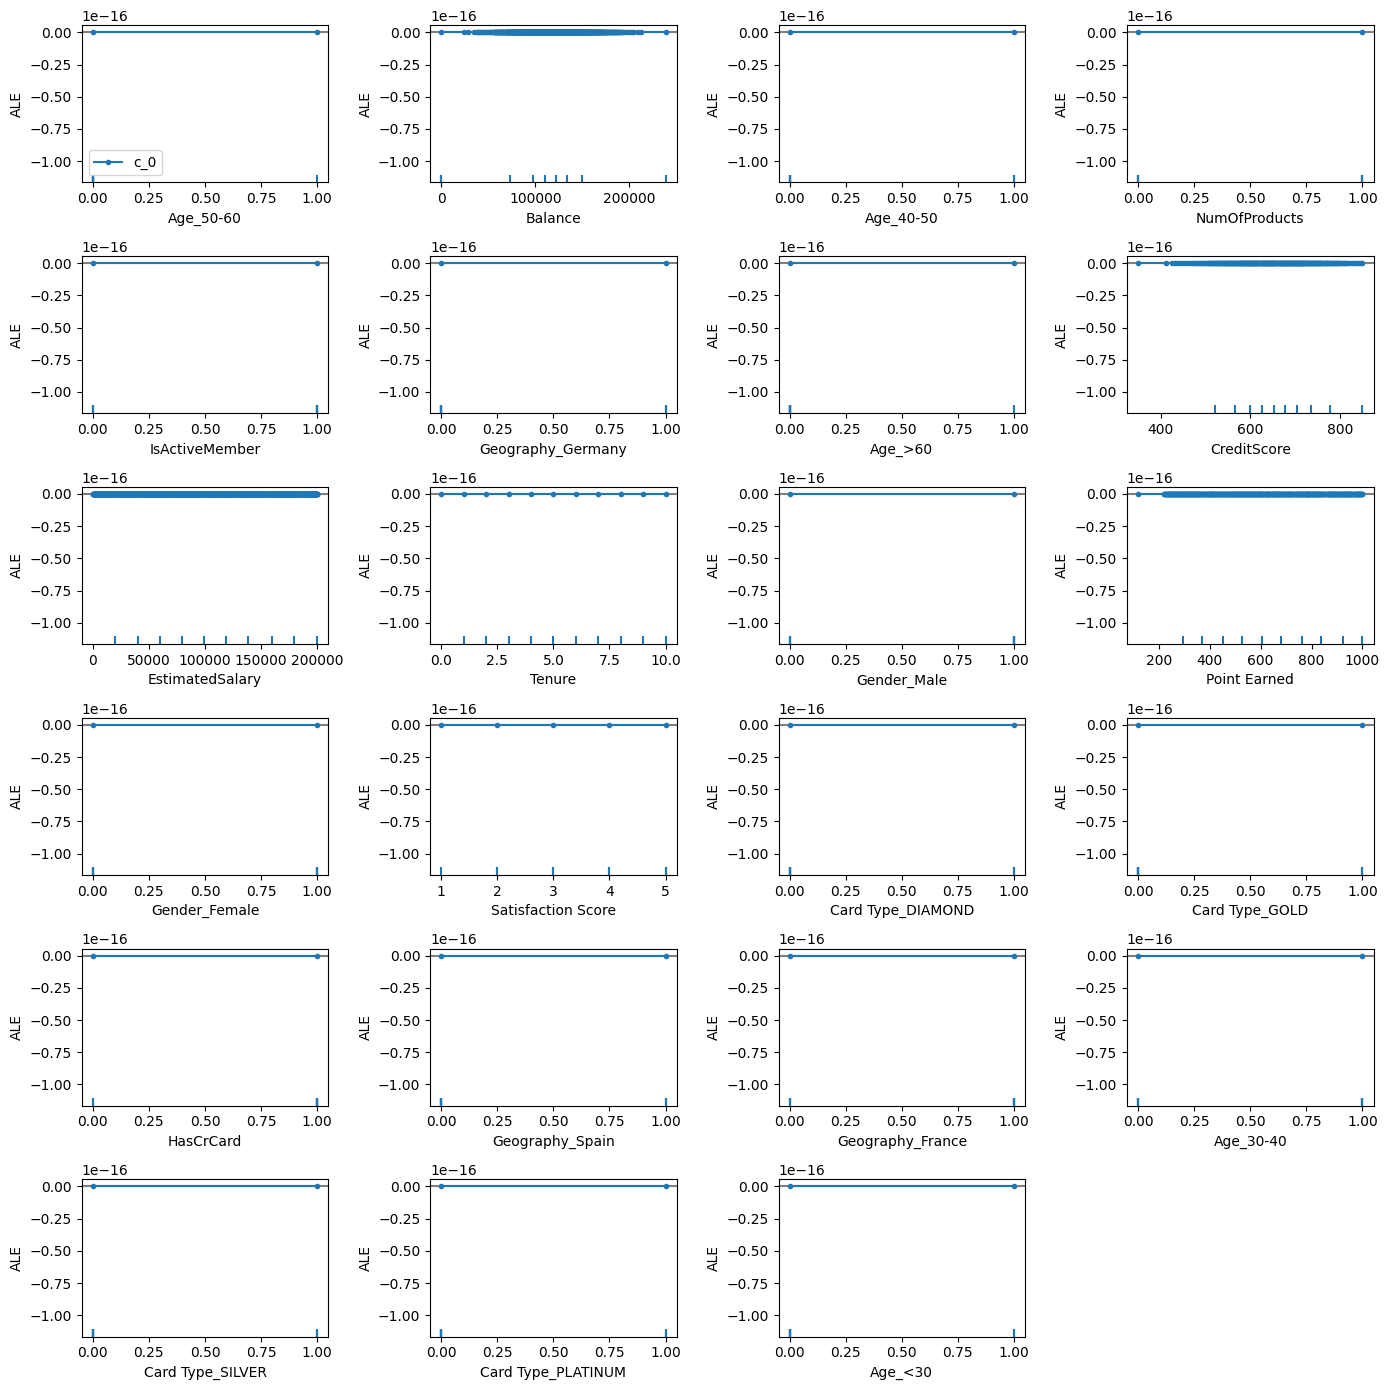

Decision Tree MSE: 0.2565

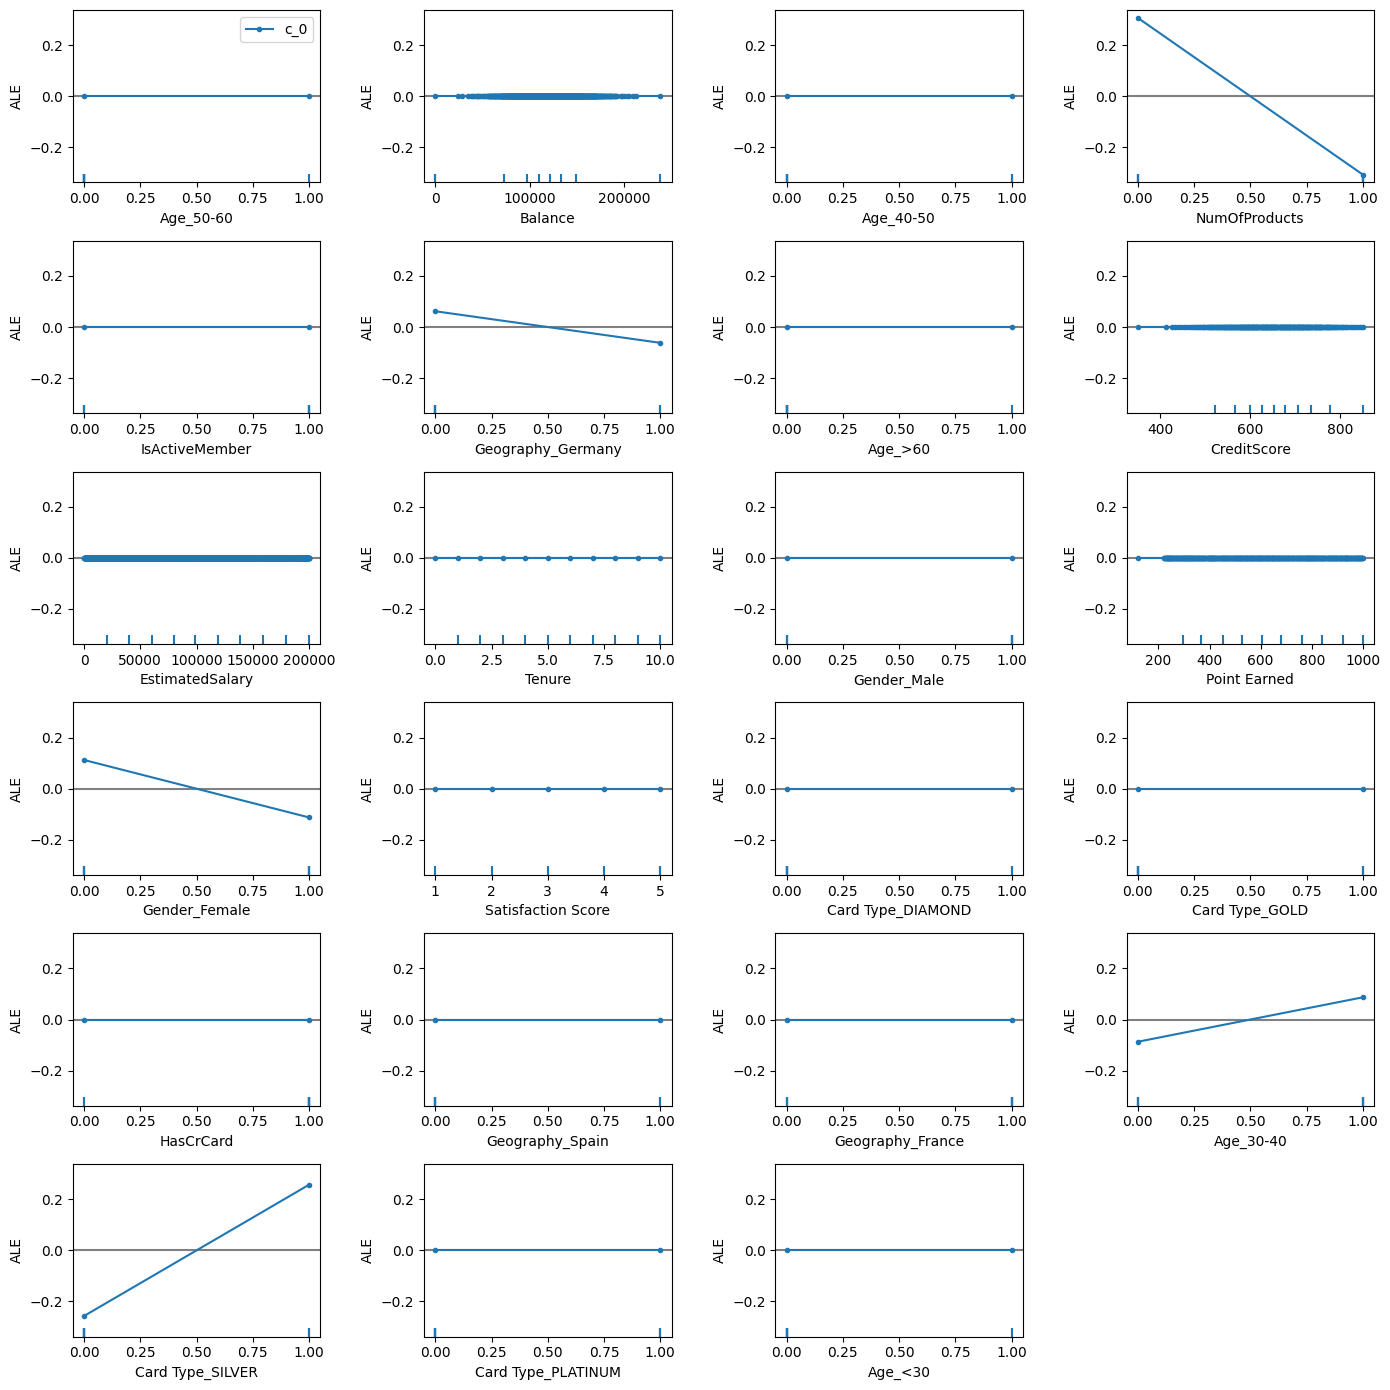

Across both logistic regression and decision tree models, the ALE method shows that almost no variables have low or no impact on the prediction, but what we can say is that 'age_30-40' and 'CardType_SILVER' have a possitive impact for the decision tree prediction, which hasn't been as clear or relevant as other age groups have been up to this moment, but in this case they can be considerent as the two only variables with any effect in the model. Also, the decision tree shows a clear negative influence of 'NumOfProducts', which supports our previous conclussions.


Overall, we can see that PDP supports the conclussions we have made for the 'intrinsically interpretable model' step's results, but also, giving some really interesting insights, on how each of the most important variables in the model affect the prediction. In the ALE case, the results dont meet with what we have seen overall, so ALE may not be the best way to interpret our case.

## LOCAL MODEL AGNOSTIC METHODS

This sections requires the use of SHAP, and we will use it with our random forest regression model

- Random Forest Regression

In [42]:
best_params = rdForestStudy.best_params
randomForestReg = RandomForestRegressor(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42,
)
randomForestReg.fit(X_train, y_train)
#Score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
forest_score = cross_val_score(randomForestReg, X_train, y_train, cv=skf,scoring="neg_mean_squared_error", n_jobs=-1).mean() 
print(forest_score) 
   
y_pred = randomForestReg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', round(mae, 2))

-0.1227196104451496
MAE: 0.24


IMPORTANT: Here we cant use shap because the latest accepted version of python is 3.9, but we are at 3.13.1, so we will have to run it on google collab, so the image and text below are the result of the code. Again, we are sorry for the inconvenience.

In [ ]:
import shap
explainer = shap.Explainer(randomForestReg, X_train)
shap_values = explainer(X_test)

 98%|===================| 1969/2000 [00:37<00:00]  

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=23)

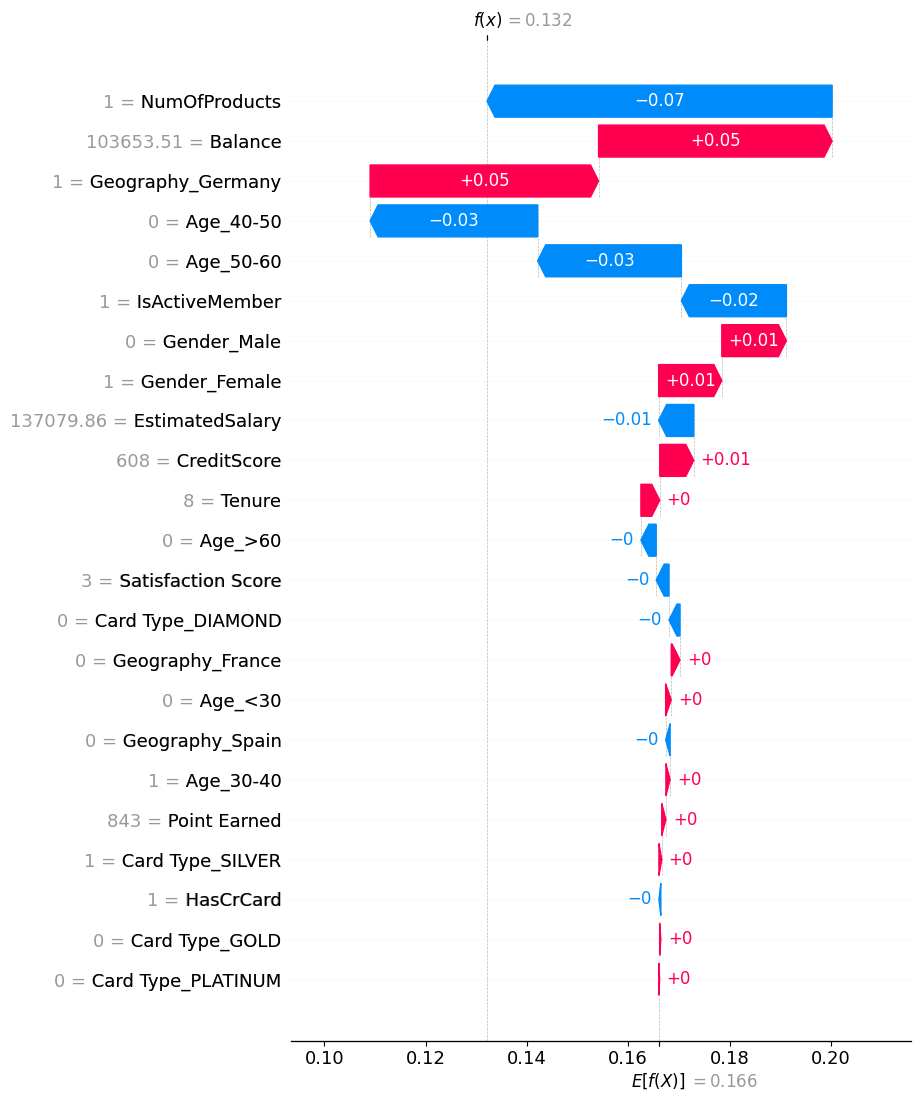

In [ ]:
shap.plots.bar(shap_values)

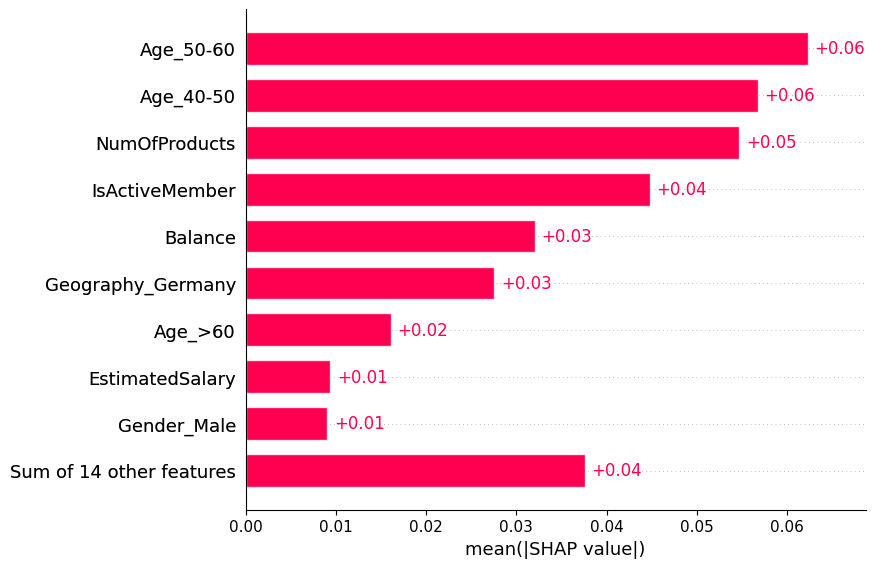

In [ ]:
shap.initjs()
shap.plots.force(shap_values[1])

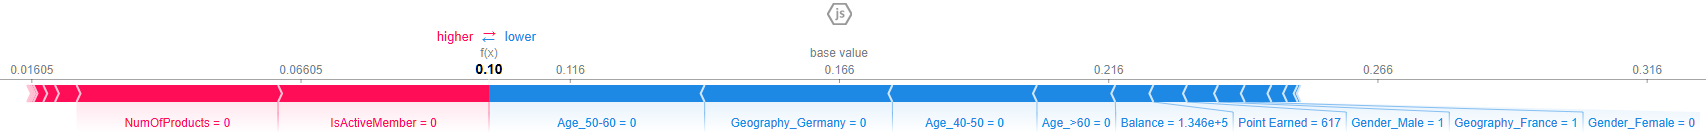

From the SHAP results, we can guess some general ideas: First, the variables that affect more the model when they have certain values are: (The 1st value is the value at which the variable affects the model, and the 2nd is the contribution value)

Negatively: 'NumOfColumns'(1)  (-0.7), 'Age_40-50' (0) (-0.03), 'Age_50-60'(0) (-0.03), 'IsActiveMember' (1) (-0.02)

Positively: 'Geography_Germany' (1) (0.05), 'Balance' (103653.51) (0.05), 'Gender_Male' (0) (0.01), 'Gender_Female' (1) (-0.01)   

These SHAP results, overall, are pretty similar to the ones that have gotten before with different classification models, suggesting that SHAP supports the results we have made until this moment. Also, SHAP maker a new little contribution of suggesting that, when the estimated salary is high (138089.86), the model takes it as a possible reason for staying, although, its contribution value (-0.01) is not as strong as the rest of the variables, the ones we already new that are really important for the model general conclusions, so even if its a new contribution for us, its not relevant enough for us to take it into consideration in the general case.     